# Datathon: Brazilian E-Commerce Public Dataset by Olist SCHEMA

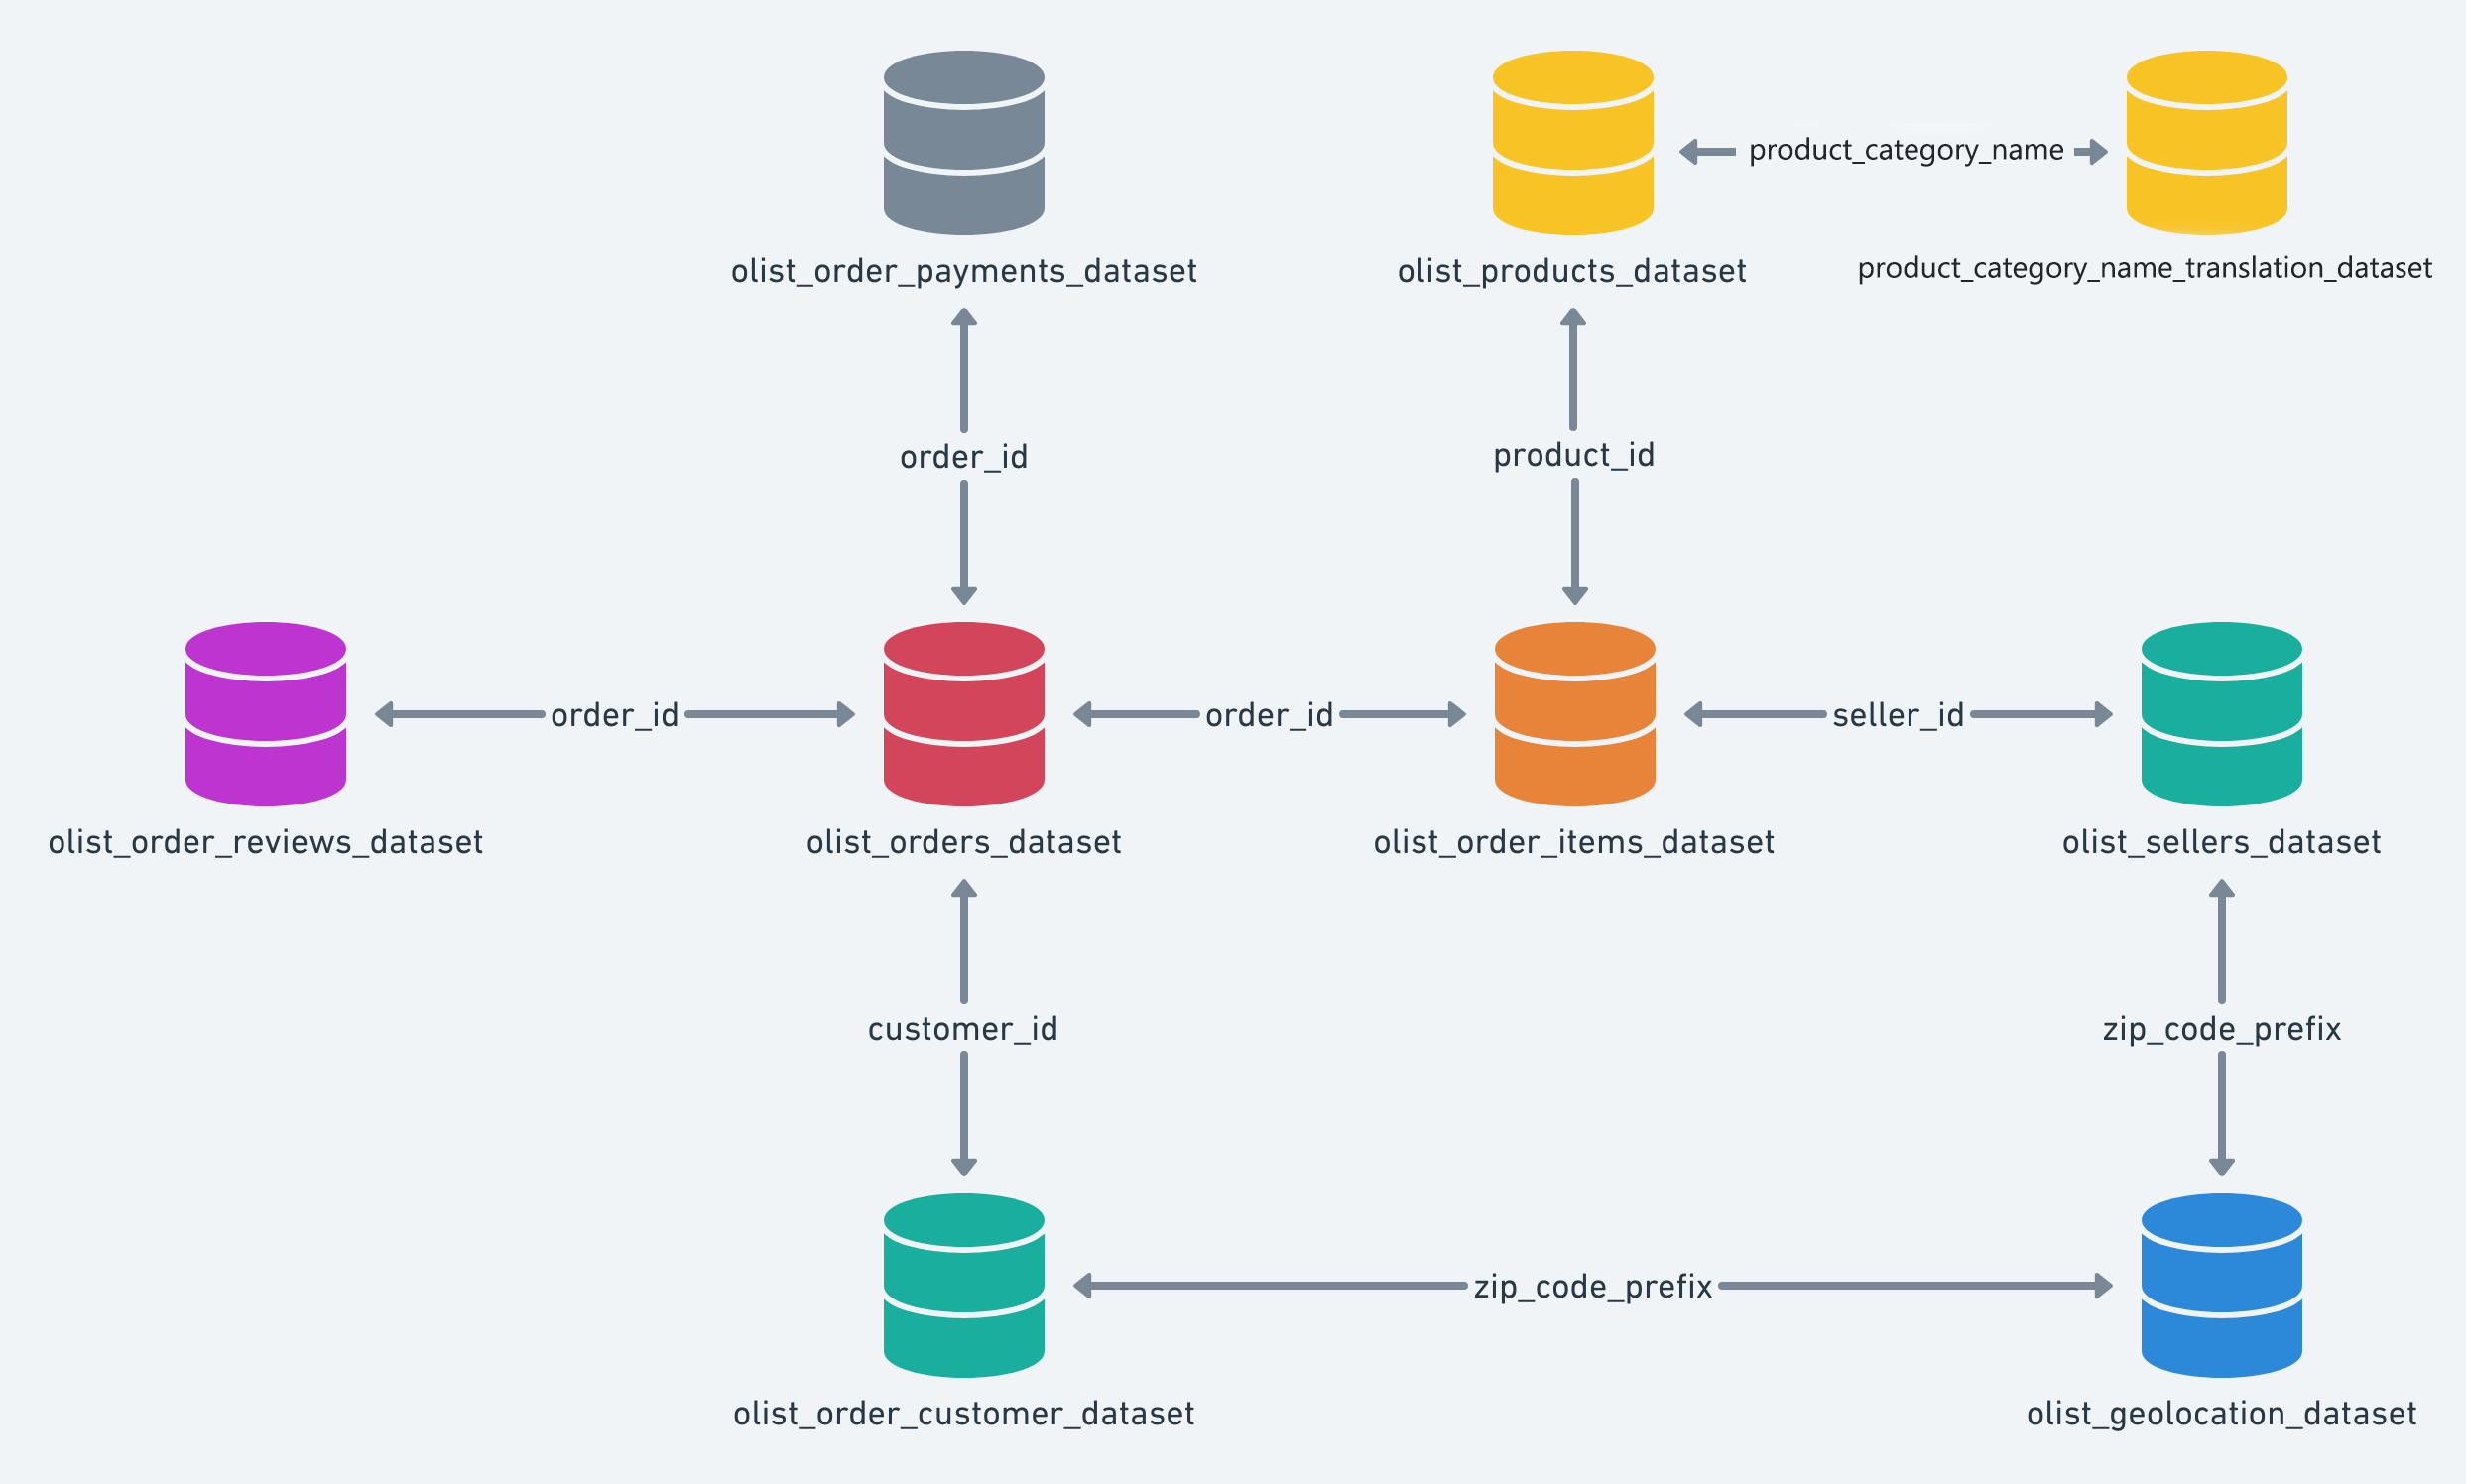

Dataset : 9개   
columns : 51개   
element : 8,605,177개
   
      
         
         

## EDA 1.OLIST Data Analysis   

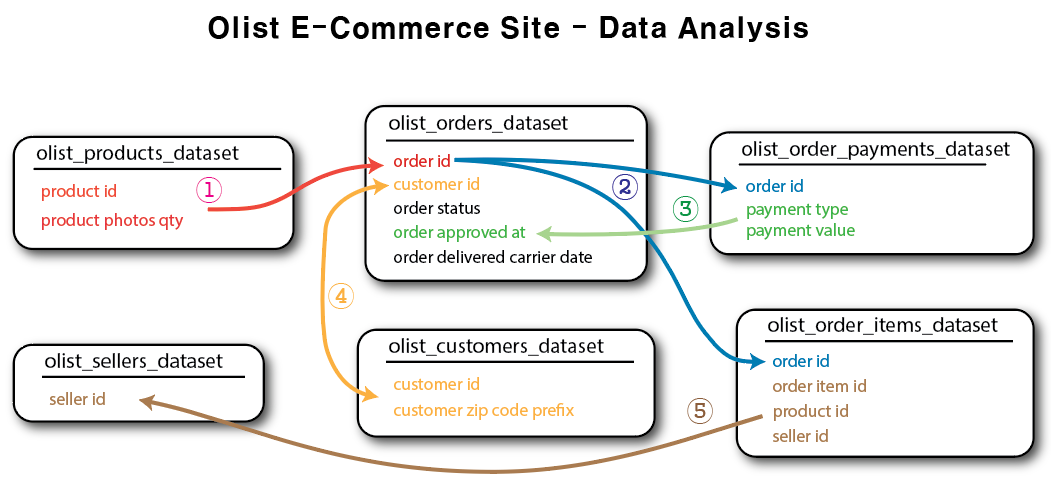

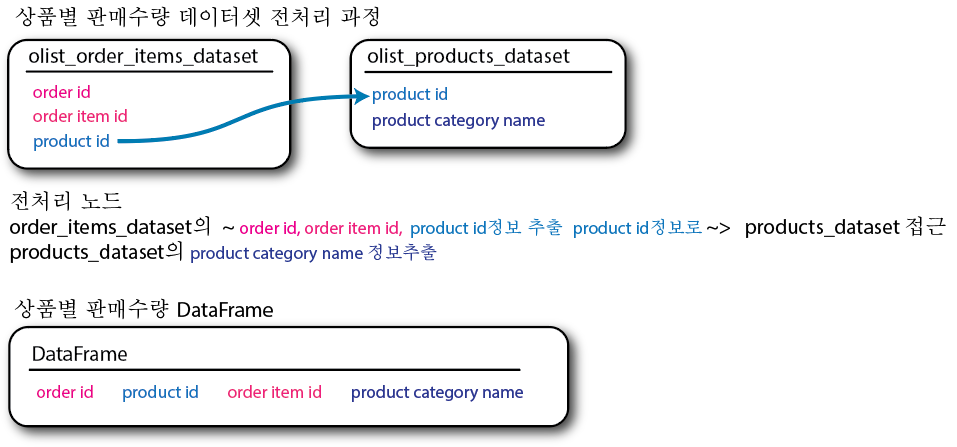

In [2]:
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import pandas as pd
import numpy as np
import os

데이터셋 로드 및 데이터프레임 생성

In [3]:
csv_path1 = "olist_customers_dataset.csv"
csv_path2 = "olist_geolocation_dataset.csv"
csv_path3 = "olist_order_items_dataset.csv"
csv_path4 = "olist_order_payments_dataset.csv"
csv_path5 = "olist_order_reviews_dataset.csv"
csv_path6 = "olist_orders_dataset.csv"
csv_path7 = "olist_products_dataset.csv"
csv_path8 = "olist_sellers_dataset.csv"
csv_path9 = "product_category_name_translation.csv"

customers = pd.read_csv(csv_path1)
geolocation = pd.read_csv(csv_path2)
order_items = pd.read_csv(csv_path3)
order_payments = pd.read_csv(csv_path4)
order_reviews = pd.read_csv(csv_path5)
orders = pd.read_csv(csv_path6)
products = pd.read_csv(csv_path7)
seller = pd.read_csv(csv_path8)
category_name = pd.read_csv(csv_path9)

In [4]:
order_items_dataframe = DataFrame(order_items, columns = ['order_id','product_id', 'order_item_id'])
product_dataframe = DataFrame(products, columns = ['product_id', 'product_category_name'])
T10_dataframe = pd.merge(order_items_dataframe, product_dataframe, on = 'product_id', how='left')

In [5]:
T10_dataframe.columns

Index(['order_id', 'product_id', 'order_item_id', 'product_category_name'], dtype='object')

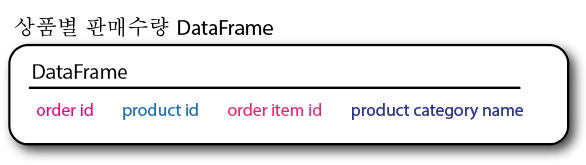

## EDA 2. 결측지 데이터필터링

In [6]:
T10_dataframe.isnull().sum()

order_id                    0
product_id                  0
order_item_id               0
product_category_name    1603
dtype: int64

결측지값 행 확인 = 1603개 발건. -> 결측지값 열 삭제

In [7]:
TO10_dataframe = T10_dataframe.dropna(axis = 0)
TO10_dataframe

order_id                        product_id  \
0       00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   
1       00018f77f2f0320c557190d7a144bdd3  e5f2d52b802189ee658865ca93d83a8f   
2       000229ec398224ef6ca0657da4fc703e  c777355d18b72b67abbeef9df44fd0fd   
3       00024acbcdf0a6daa1e931b038114c75  7634da152a4610f1595efa32f14722fc   
4       00042b26cf59d7ce69dfabb4e55b4fd9  ac6c3623068f30de03045865e4e10089   
...                                  ...                               ...   
112645  fffc94f6ce00a00581880bf54a75a037  4aa6014eceb682077f9dc4bffebc05b0   
112646  fffcd46ef2263f404302a634eb57f7eb  32e07fd915822b0765e448c4dd74c828   
112647  fffce4705a9662cd70adb13d4a31832d  72a30483855e2eafc67aee5dc2560482   
112648  fffe18544ffabc95dfada21779c9644f  9c422a519119dcad7575db5af1ba540e   
112649  fffe41c64501cc87c801fd61db3f6244  350688d9dc1e75ff97be326363655e01   

        order_item_id   product_category_name  
0                   1              cool_stuff  
1                   1                pet_shop  
2                   1        moveis_decoracao  
3                   1              perfumaria  
4                   1      ferramentas_jardim  
...               ...                     ...  
112645              1   utilidades_domesticas  
112646              1  informatica_acessorios  
112647              1           esporte_lazer  
112648              1  informatica_acessorios  
112649              1         cama_mesa_banho  

[111047 rows x 4 columns]

결측지 삭제 이전 112650행 결측지 삭제 후 111047행   
112650 - 111047 = 행 1603개 삭제 (결측지 값과 동일 잘 삭제했음)

In [8]:
top10_product = TO10_dataframe.groupby('product_category_name').count()
top10_product

order_id  product_id  order_item_id
product_category_name                                         
agro_industria_e_comercio       212         212            212
alimentos                       510         510            510
alimentos_bebidas               278         278            278
artes                           209         209            209
artes_e_artesanato               24          24             24
...                             ...         ...            ...
sinalizacao_e_seguranca         199         199            199
tablets_impressao_imagem         83          83             83
telefonia                      4545        4545           4545
telefonia_fixa                  264         264            264
utilidades_domesticas          6964        6964           6964

[73 rows x 3 columns]

product_category_name별 판매 수량 추출

In [9]:
top10_product_change = pd.merge(top10_product, category_name, on = 'product_category_name', how='outer')
top10_product_change

product_category_name  order_id  product_id  order_item_id  \
0   agro_industria_e_comercio       212         212            212   
1                   alimentos       510         510            510   
2           alimentos_bebidas       278         278            278   
3                       artes       209         209            209   
4          artes_e_artesanato        24          24             24   
..                        ...       ...         ...            ...   
68    sinalizacao_e_seguranca       199         199            199   
69   tablets_impressao_imagem        83          83             83   
70                  telefonia      4545        4545           4545   
71             telefonia_fixa       264         264            264   
72      utilidades_domesticas      6964        6964           6964   

   product_category_name_english  
0     agro_industry_and_commerce  
1                           food  
2                     food_drink  
3                            art  
4          arts_and_craftmanship  
..                           ...  
68        signaling_and_security  
69        tablets_printing_image  
70                     telephony  
71               fixed_telephony  
72                    housewares  

[73 rows x 5 columns]

스페인어의 product_category_name를 영어로 변경

## EDA 3. 데이터 시각화

<AxesSubplot:xlabel='order_id', ylabel='product_category_name_english'>

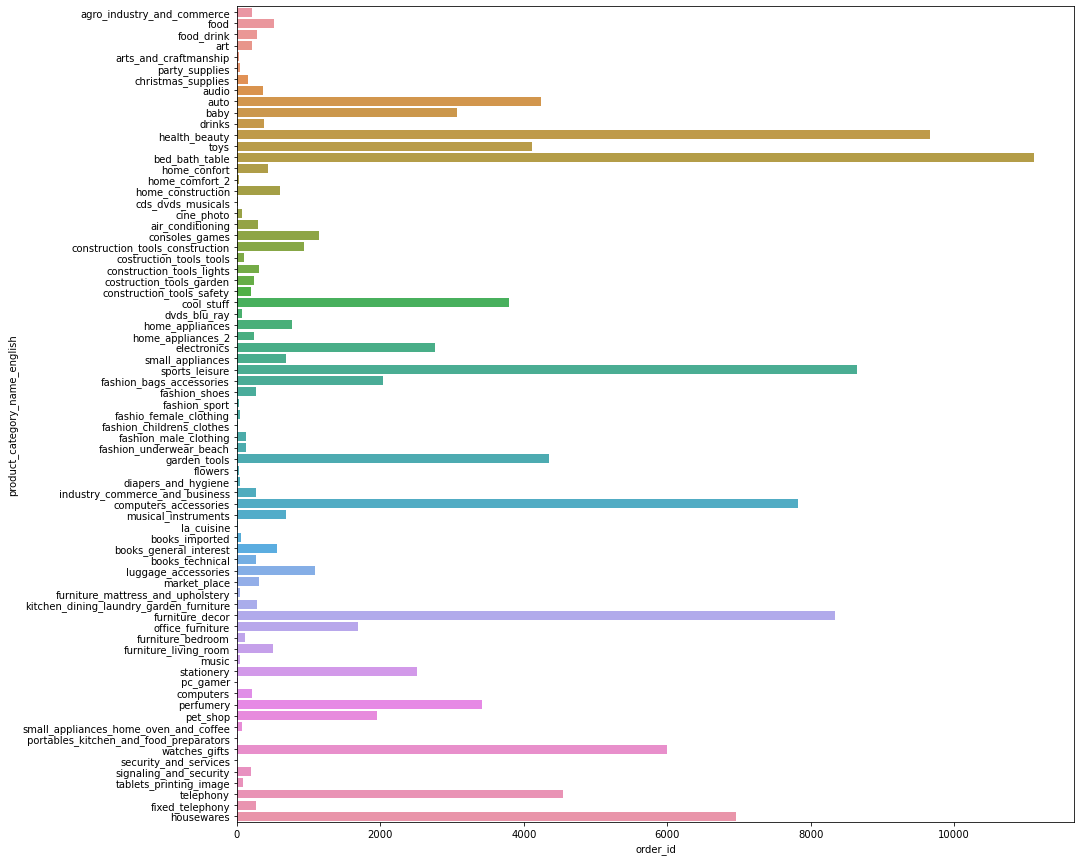

In [10]:
plt.figure(figsize=(15,15))
sns.barplot(x='order_id', y='product_category_name_english', data=top10_product_change, orient='h')

판매량 상위 10위 제품만 있는 dataframe생성 후 시각화

In [10]:
df = top10_product_change.sort_values(by=["order_id"], ascending=[False]) 
top10_product = df.loc[[13,11,32,54,44,72,66,70,40,8],['product_category_name_english', 'order_id']]
top10_product.head(10)

product_category_name_english  order_id
13                bed_bath_table     11115
11                 health_beauty      9670
32                sports_leisure      8641
54               furniture_decor      8334
44         computers_accessories      7827
72                    housewares      6964
66                 watches_gifts      5991
70                     telephony      4545
40                  garden_tools      4347
8                           auto      4235

<AxesSubplot:xlabel='order_id', ylabel='product_category_name_english'>

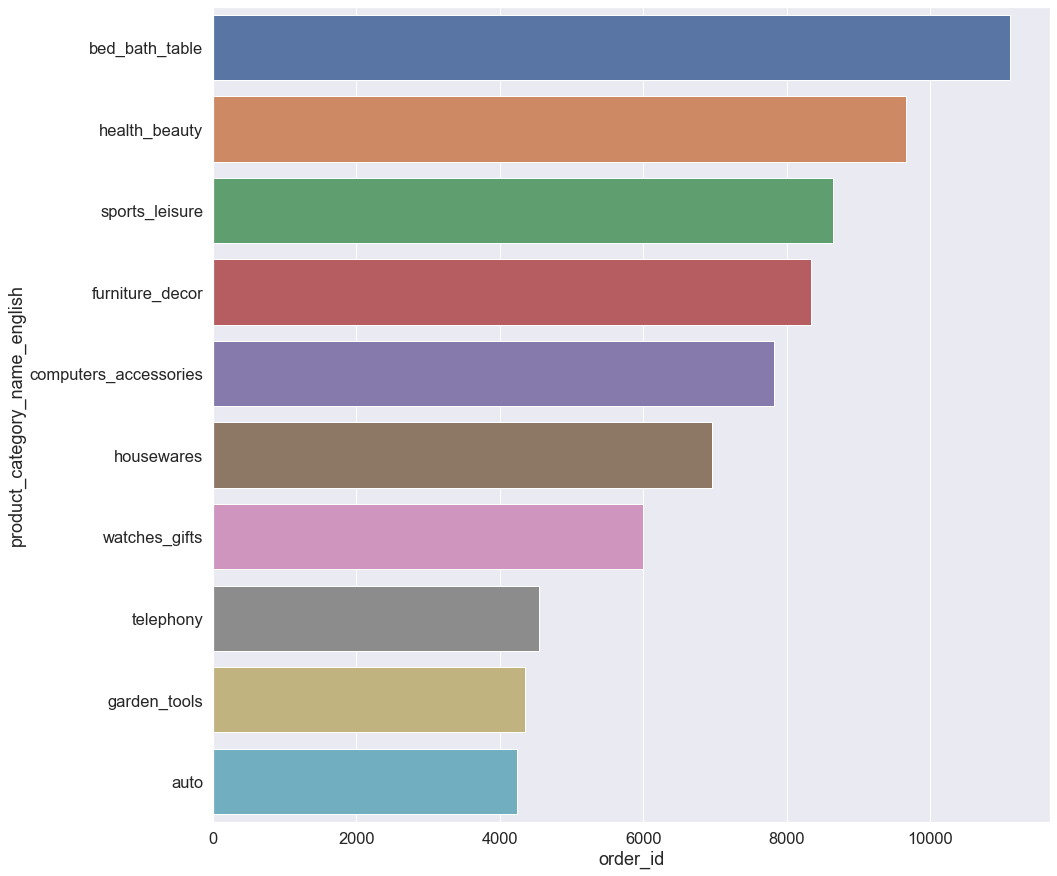

In [28]:
plt.figure(figsize=(15,15))
sns.barplot(x='order_id', y='product_category_name_english', data=top10_product)

<Figure size 2160x720 with 0 Axes>

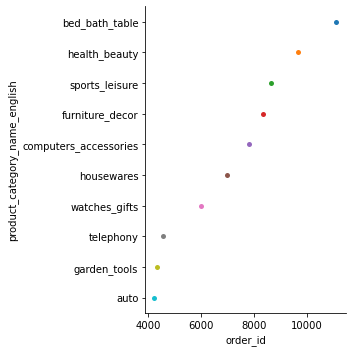

In [12]:
plt.figure(figsize=(30,10))
sns.catplot(x="order_id", y="product_category_name_english", jitter=False, data=top10_product)

<AxesSubplot:xlabel='product_category_name_english', ylabel='order_id'>

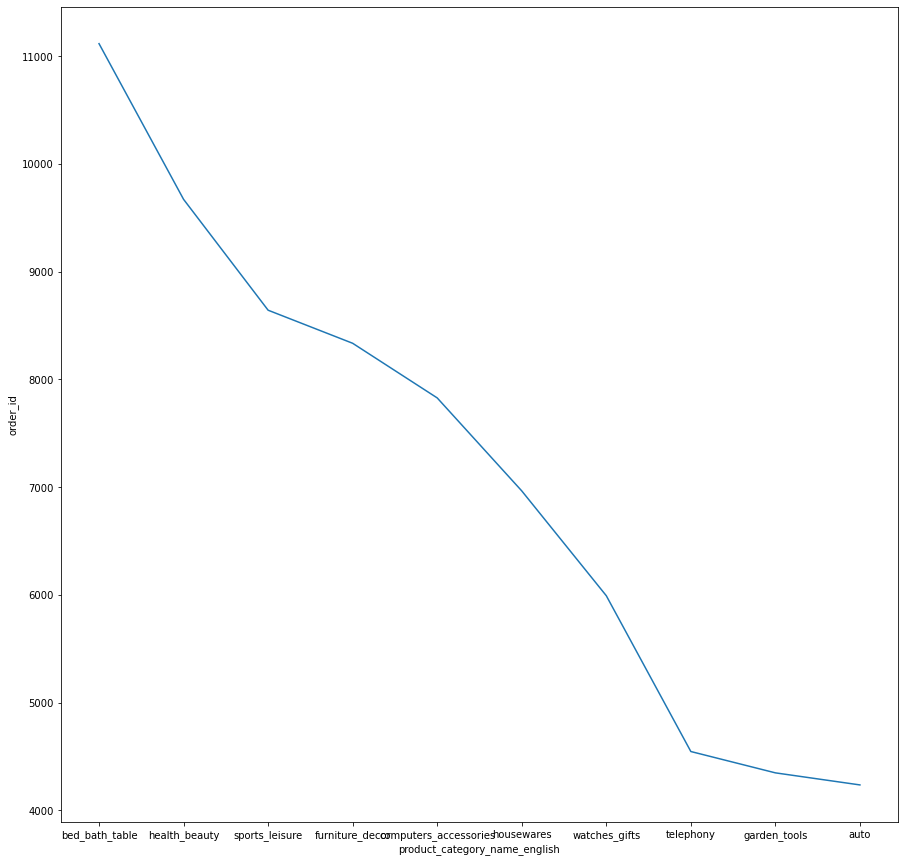

In [13]:
plt.figure(figsize=(15,15))
sns.lineplot(data=top10_product, x='product_category_name_english', y='order_id')

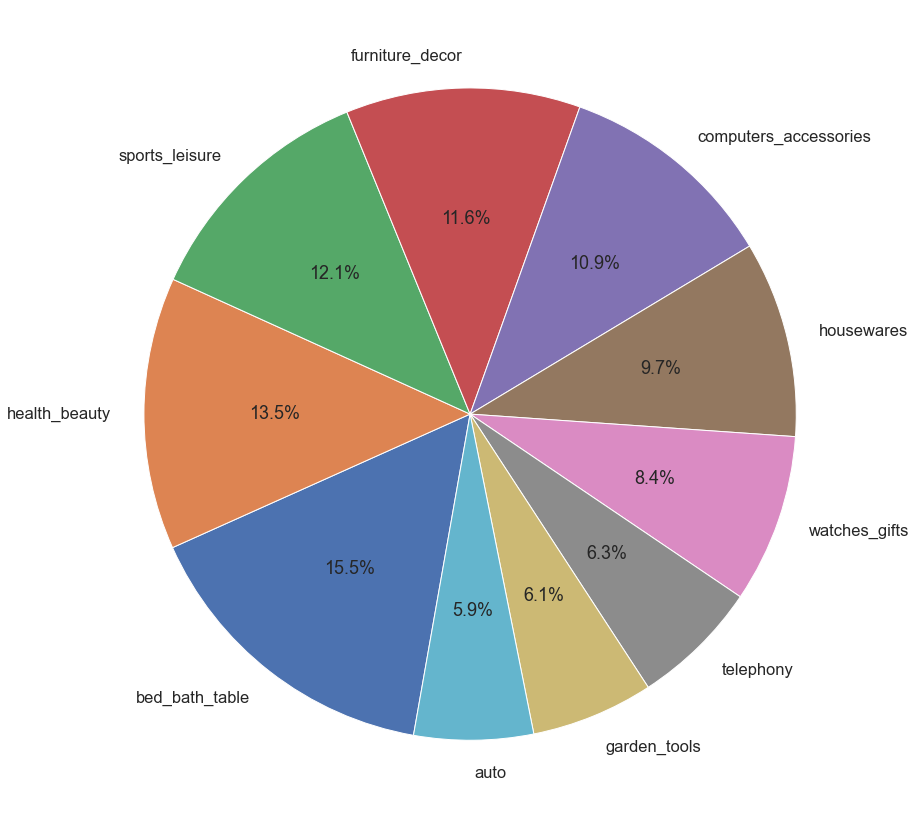

In [35]:
plt.figure(figsize=(15,15))
ratio = top10_product['order_id']
labels = top10_product['product_category_name_english']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

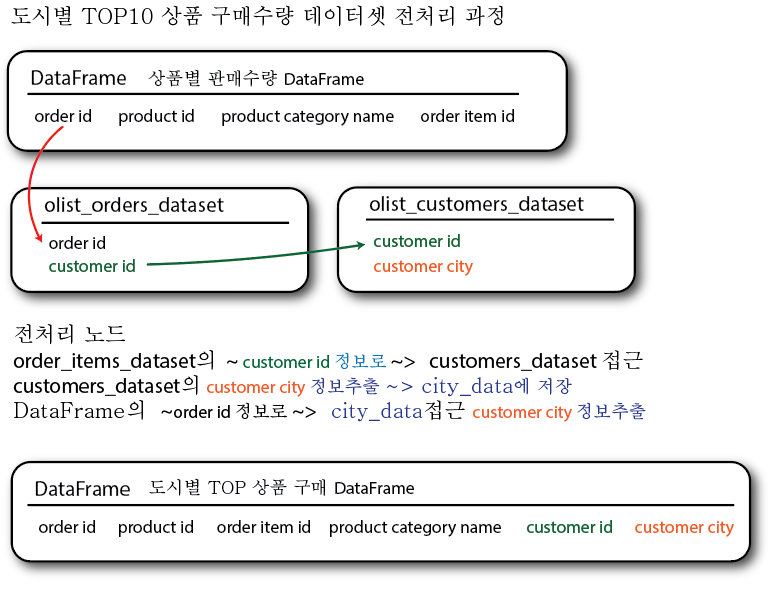

In [17]:
df1 = DataFrame(orders, columns = ['order_id', 'customer_id'])
df2 = DataFrame(customers, columns = ['customer_id', 'customer_city'])
dfmerge = pd.merge(df1, df2, on = 'customer_id', how='left')
product = pd.merge(TO10_dataframe, dfmerge, on = 'order_id', how = 'left')
product.isnull().sum()

order_id                 0
product_id               0
order_item_id            0
product_category_name    0
customer_id              0
customer_city            0
dtype: int64

In [18]:
p_c = DataFrame(product, columns = ['product_category_name', 'customer_city'])
pcity = pd.merge(p_c, category_name, on = 'product_category_name', how='outer')
pcity

product_category_name          customer_city  \
0                          cool_stuff  campos dos goytacazes   
1                          cool_stuff                cubatao   
2                          cool_stuff         rio de janeiro   
3                          cool_stuff                  cunha   
4                          cool_stuff              sao paulo   
...                               ...                    ...   
111042  fashion_roupa_infanto_juvenil              sao paulo   
111043  fashion_roupa_infanto_juvenil               blumenau   
111044  fashion_roupa_infanto_juvenil               macaubas   
111045  fashion_roupa_infanto_juvenil              sao paulo   
111046  fashion_roupa_infanto_juvenil            nova iguacu   

       product_category_name_english  
0                         cool_stuff  
1                         cool_stuff  
2                         cool_stuff  
3                         cool_stuff  
4                         cool_stuff  
...                              ...  
111042     fashion_childrens_clothes  
111043     fashion_childrens_clothes  
111044     fashion_childrens_clothes  
111045     fashion_childrens_clothes  
111046     fashion_childrens_clothes  

[111047 rows x 3 columns]

In [19]:
product_ci = DataFrame(pcity, columns = ['product_category_name_english', 'customer_city'])
product_ci['count'] = 0
product_ci

product_category_name_english          customer_city  count
0                         cool_stuff  campos dos goytacazes      0
1                         cool_stuff                cubatao      0
2                         cool_stuff         rio de janeiro      0
3                         cool_stuff                  cunha      0
4                         cool_stuff              sao paulo      0
...                              ...                    ...    ...
111042     fashion_childrens_clothes              sao paulo      0
111043     fashion_childrens_clothes               blumenau      0
111044     fashion_childrens_clothes               macaubas      0
111045     fashion_childrens_clothes              sao paulo      0
111046     fashion_childrens_clothes            nova iguacu      0

[111047 rows x 3 columns]

In [22]:
product_city = pd.DataFrame(product_ci.groupby(['product_category_name_english', 'customer_city'])['count'].count())
# product_city = product_city.reset_index()
product_city

count
product_category_name_english customer_city       
 pc_gamer                     gravata            1
                              guarulhos          1
                              ibiraiaras         1
                              montes claros      1
                              queimados          1
...                                            ...
watches_gifts                 votorantim         5
                              votuporanga        2
                              xavantina          1
                              xaxim              1
                              xinguara           1

[25221 rows x 1 columns]

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import json
import requests
import folium
from folium.plugins import FastMarkerCluster, Fullscreen, MiniMap, HeatMap, HeatMapWithTime, LocateControl
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

In [3]:
base_path = "/content/drive/MyDrive/Colab Notebooks/olist/"
csv_path1 = base_path + "olist_customers_dataset.csv"
csv_path2 = base_path + "olist_geolocation_dataset.csv"
csv_path3 = base_path + "olist_order_items_dataset.csv"
csv_path4 = base_path + "olist_order_payments_dataset.csv"
csv_path5 = base_path + "olist_order_reviews_dataset.csv"
csv_path6 = base_path + "olist_orders_dataset.csv"
csv_path7 = base_path + "olist_products_dataset.csv"
csv_path8 = base_path + "olist_sellers_dataset.csv"
csv_path9 = base_path + "product_category_name_translation.csv"

In [4]:
customers_data = pd.read_csv(csv_path1)
geolocation_data = pd.read_csv(csv_path2)
order_items_data = pd.read_csv(csv_path3)
order_payments_data = pd.read_csv(csv_path4)
order_reviews_data = pd.read_csv(csv_path5)
orders_data = pd.read_csv(csv_path6)
products_data = pd.read_csv(csv_path7)
sellers_data = pd.read_csv(csv_path8)
category_name_translation = pd.read_csv(csv_path9)

In [17]:
products_data=pd.merge(products_data, category_name_translation, on = 'product_category_name')

In [18]:
del products_data['product_category_name']

In [19]:
products_data.rename(columns = {'product_category_name_english':'product_category_name'},inplace=True)
products_data

product_id  product_name_lenght  \
0      1e9e8ef04dbcff4541ed26657ea517e5                 40.0   
1      6a2fb4dd53d2cdb88e0432f1284a004c                 39.0   
2      0d009643171aee696f4733340bc2fdd0                 52.0   
3      b1eae565a61935e0011ee7682fef9dc9                 49.0   
4      8da90b37f0fb171b4877c124f965b1f6                 56.0   
...                                 ...                  ...   
32336  13b25797ad1e6d6c7cd3cbeb35f8ee7a                 44.0   
32337  dc36a7859b743d8610a2bbbaea26ece9                 29.0   
32338  107fde0930956120d1e13dd1062fbb46                 51.0   
32339  726b4e18f00255e2e63491bcba3f60b8                 41.0   
32340  1dceebcc5f23c02ea23e16d5bedca000                 47.0   

       product_description_lenght  product_photos_qty  product_weight_g  \
0                           287.0                 1.0             225.0   
1                           346.0                 2.0             400.0   
2                           150.0                 1.0             422.0   
3                           460.0                 2.0             267.0   
4                           733.0                 3.0             377.0   
...                           ...                 ...               ...   
32336                       348.0                 1.0           18250.0   
32337                      2073.0                 2.0            2500.0   
32338                       418.0                 1.0           30000.0   
32339                       866.0                 1.0            1700.0   
32340                       117.0                 2.0             550.0   

       product_length_cm  product_height_cm  product_width_cm  \
0                   16.0               10.0              14.0   
1                   27.0                5.0              20.0   
2                   21.0               16.0              18.0   
3                   17.0               13.0              17.0   
4                   18.0               13.0              15.0   
...                  ...                ...               ...   
32336               25.0               25.0              25.0   
32337               41.0               21.0              21.0   
32338               60.0               73.0              60.0   
32339               70.0               10.0             100.0   
32340               35.0               15.0              25.0   

                   product_category_name  
0                              perfumery  
1                              perfumery  
2                              perfumery  
3                              perfumery  
4                              perfumery  
...                                  ...  
32336  furniture_mattress_and_upholstery  
32337  furniture_mattress_and_upholstery  
32338  furniture_mattress_and_upholstery  
32339  furniture_mattress_and_upholstery  
32340                  cds_dvds_musicals  

[32341 rows x 9 columns]

In [20]:
# 결측치 확인
DF = [customers_data, geolocation_data,order_items_data, order_payments_data,order_reviews_data, orders_data,products_data,sellers_data, category_name_translation]
names = ['customers_data', 'geolocation_data','order_items_data', 'order_payments_data','order_reviews_data', 'orders_data','products_data','sellers_data','category_name_translation']

In [21]:
customers_data.shape[0]

99441

In [22]:
data_info = pd.DataFrame({})
data_info['dataset']=names
data_info['n_rows'] = [df.shape[0] for df in DF]
data_info['n_cols']=[df.shape[1] for df in DF]
data_info['null_amount'] = [df.isnull().sum().sum() for df in DF]
data_info['null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in DF]
data_info['null_columns_names'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in DF]

data_info


dataset   n_rows  n_cols  null_amount  null_columns  \
0             customers_data    99441       5            0             0   
1           geolocation_data  1000163       5            0             0   
2           order_items_data   112650       7            0             0   
3        order_payments_data   103886       5            0             0   
4         order_reviews_data    99224       7       145903             2   
5                orders_data    99441       8         4908             3   
6              products_data    32341       9            4             4   
7               sellers_data     3095       4            0             0   
8  category_name_translation       73       2            0             0   

                                  null_columns_names  
0                                                     
1                                                     
2                                                     
3                                                     
4       review_comment_title, review_comment_message  
5  order_approved_at, order_delivered_carrier_dat...  
6  product_weight_g, product_length_cm, product_h...  
7                                                     
8

# 지도 

In [26]:
geolocation_data

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao paulo                SP  
2              sao paulo                SP  
3              sao paulo                SP  
4              sao paulo                SP  
...                  ...               ...  
1000158         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000161  david canabarro                RS  
1000162         tapejara                RS  

[1000163 rows x 5 columns]

브라질 우편번호는 우편번호(Costal Addressing Code)를 의미하며, 8자리로 구성되어 있다. 1972년 5자릿수의 시퀀스로 도입되었으며, 1992년 8자릿수로 확대되어 보다 정밀한 국지화가 가능해졌다. 표준 형식은 "nnnnn-nnn"(원래 5자리, 하이픈 및 새 3자리)입니다.

CEP: 12345-678

인구 100,000명 이상의 대부분의 도시들은 모든 공공 장소와 주요 상업 건물과 큰 주거용 콘도와 같은 높은 거주자의 개인 공간에 CEP를 할당한다. 작은 마을에는 일반적인 5자리 코드 뒤에 접미사 -000이 붙는다.  

첫 번째 부분은 Region, Subregion, Sector, Subsector 및 Subsector Splitter를 나타내는 5자리 숫자로 구성됩니다.
두 번째 부분에는 첫 번째 부분과 하이픈으로 구분된 세 자리 숫자가 포함되어 있으며 분포 식별자를 나타냅니다.

In [27]:
geolocation_data = geolocation_data.astype({'geolocation_zip_code_prefix': str})

# Gets the first three and four first digits of zip codes, we will explore this further to understand how zip codes works
geolocation_data['geolocation_zip_code_prefix_Region'] = geolocation_data['geolocation_zip_code_prefix'].str[0:1]
geolocation_data['geolocation_zip_code_prefix_Subregion'] = geolocation_data['geolocation_zip_code_prefix'].str[0:2]
geolocation_data['geolocation_zip_code_prefix_Sector'] = geolocation_data['geolocation_zip_code_prefix'].str[0:3]
geolocation_data['geolocation_zip_code_prefix_Subsector'] = geolocation_data['geolocation_zip_code_prefix'].str[0:4]
geolocation_data

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                              1037       -23.545621       -46.639292   
1                              1046       -23.546081       -46.644820   
2                              1046       -23.546129       -46.642951   
3                              1041       -23.544392       -46.639499   
4                              1035       -23.541578       -46.641607   
...                             ...              ...              ...   
1000158                       99950       -28.068639       -52.010705   
1000159                       99900       -27.877125       -52.224882   
1000160                       99950       -28.071855       -52.014716   
1000161                       99980       -28.388932       -51.846871   
1000162                       99950       -28.070104       -52.018658   

        geolocation_city geolocation_state geolocation_zip_code_prefix_Region  \
0              sao paulo                SP                                  1   
1              sao paulo                SP                                  1   
2              sao paulo                SP                                  1   
3              sao paulo                SP                                  1   
4              sao paulo                SP                                  1   
...                  ...               ...                                ...   
1000158         tapejara                RS                                  9   
1000159   getulio vargas                RS                                  9   
1000160         tapejara                RS                                  9   
1000161  david canabarro                RS                                  9   
1000162         tapejara                RS                                  9   

        geolocation_zip_code_prefix_Subregion  \
0                                          10   
1                                          10   
2                                          10   
3                                          10   
4                                          10   
...                                       ...   
1000158                                    99   
1000159                                    99   
1000160                                    99   
1000161                                    99   
1000162                                    99   

        geolocation_zip_code_prefix_Sector  \
0                                      103   
1                                      104   
2                                      104   
3                                      104   
4                                      103   
...                                    ...   
1000158                                999   
1000159                                999   
1000160                                999   
1000161                                999   
1000162                                999   

        geolocation_zip_code_prefix_Subsector  
0                                        1037  
1                                        1046  
2                                        1046  
3                                        1041  
4                                        1035  
...                                       ...  
1000158                                  9995  
1000159                                  9990  
1000160                                  9995  
1000161                                  9998  
1000162                                  9995  

[1000163 rows x 9 columns]

In [28]:
geolocation_data['geolocation_zip_code_prefix'].value_counts().to_frame().describe()

geolocation_zip_code_prefix
count                 19015.000000
mean                     52.598633
std                      72.057907
min                       1.000000
25%                      10.000000
50%                      29.000000
75%                      66.500000
max                    1146.000000

전체 19051 다른 우편 번호가 있다.  
평균적으로 각 접두사마다 52.6개의 좌표가 있다. 그러나 1.146 좌표를 사용할 수 있는 접두사가 하나 있습니다.

브라질 지역이 아닌 곳은 제외 (이상치 제거)

In [29]:
# 브라질 지역으로만 설정
#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.
geolocation_data = geolocation_data[geolocation_data.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geolocation_data = geolocation_data[geolocation_data.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geolocation_data = geolocation_data[geolocation_data.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geolocation_data = geolocation_data[geolocation_data.geolocation_lng <=  -34.79314722]

그런 다음 위도와 경도 좌표를 처리하고 메르카토르(Mercator) x/y 좌표로 변환한다.


In [31]:
from datashader.utils import lnglat_to_meters as webm
x, y = webm(geolocation_data .geolocation_lng, geolocation_data .geolocation_lat)
geolocation_data ['x'] = pd.Series(x)
geolocation_data ['y'] = pd.Series(y)

In [32]:
geolocation_data.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                        1037       -23.545621       -46.639292   
1                        1046       -23.546081       -46.644820   
2                        1046       -23.546129       -46.642951   
3                        1041       -23.544392       -46.639499   
4                        1035       -23.541578       -46.641607   

  geolocation_city geolocation_state geolocation_zip_code_prefix_Region  \
0        sao paulo                SP                                  1   
1        sao paulo                SP                                  1   
2        sao paulo                SP                                  1   
3        sao paulo                SP                                  1   
4        sao paulo                SP                                  1   

  geolocation_zip_code_prefix_Subregion geolocation_zip_code_prefix_Sector  \
0                                    10                                103   
1                                    10                                104   
2                                    10                                104   
3                                    10                                104   
4                                    10                                103   

  geolocation_zip_code_prefix_Subsector             x             y  
0                                  1037 -5.191862e+06 -2.698137e+06  
1                                  1046 -5.192478e+06 -2.698193e+06  
2                                  1046 -5.192270e+06 -2.698199e+06  
3                                  1041 -5.191885e+06 -2.697988e+06  
4                                  1035 -5.192120e+06 -2.697646e+06

지도에 좌표를 표시합니다. 우편 번호 접두사와 해당 우편 번호의 위치 사이에는 관계가 있다.

In [33]:
# int로 변환
geolocation_data['geolocation_zip_code_prefix'] = geolocation_data['geolocation_zip_code_prefix'].astype(int)
geolocation_data['geolocation_zip_code_prefix_Region'] = geolocation_data['geolocation_zip_code_prefix_Region'].astype(int)
geolocation_data['geolocation_zip_code_prefix_Subregion'] = geolocation_data['geolocation_zip_code_prefix_Subregion'].astype(int)
geolocation_data['geolocation_zip_code_prefix_Sector'] = geolocation_data['geolocation_zip_code_prefix_Sector'].astype(int)
geolocation_data['geolocation_zip_code_prefix_Subsector'] = geolocation_data['geolocation_zip_code_prefix_Subsector'].astype(int)

In [34]:
brazil = geolocation_data
agg_name = 'geolocation_zip_code_prefix'
brazil[agg_name].to_frame().describe()

geolocation_zip_code_prefix
count                 1.000121e+06
mean                  3.657332e+04
std                   3.054939e+04
min                   1.001000e+03
25%                   1.107500e+04
50%                   2.653000e+04
75%                   6.350400e+04
max                   9.999000e+04

In [39]:
# plot wtih holoviews + datashader - bokeh with map background
import holoviews as hv
import geoviews as gv
import datashader as ds
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr
from datashader.colors import colormap_select, Greys9
from holoviews.streams import RangeXY
from holoviews.operation.datashader import datashade, dynspread, rasterize
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
hv.extension('bokeh')

%opts Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]
%opts QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.2)
%env HV_DOC_HTML = True
T = 0.05
PX = 1

def plot_map(data, label, agg_data, agg_name, cmap):
    url="http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"
    geomap = gv.WMTS(url)
    points = hv.Points(gv.Dataset(data, kdims=['x', 'y'], vdims=[agg_name]))
    agg = datashade(points, element_type=gv.Image, aggregator=agg_data, cmap=cmap)
    zip_codes = dynspread(agg, threshold=T, max_px=PX)
    hover = hv.util.Dynamic(rasterize(points, aggregator=agg_data, width=50, height=25, streams=[RangeXY]), operation=hv.QuadMesh)
    hover = hover.options(cmap=cmap)
    img = geomap * zip_codes * hover
    img = img.relabel(label)
    hv.extension('bokeh')
    return img

Output hidden; open in https://colab.research.google.com to view.

In [40]:
plot_map(brazil, 'Zip Codes in Brazil', ds.min(agg_name), agg_name, cmap=rainbow)

Output hidden; open in https://colab.research.google.com to view.

In [41]:
# plot wtih datashader - image with black background
import datashader as ds
from datashader import transfer_functions as tf
from functools import partial
from datashader.utils import export_image
from IPython.core.display import HTML, display
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr

background = "black"
cm = partial(colormap_select, reverse=(background!="black"))
export = partial(export_image, background = background, export_path="export")
display(HTML("<style>.container { width:100% !important; }</style>"))
W = 700 

def create_map(data, cmap, data_agg, export_name='img'):
    pad = (data.x.max() - data.x.min())/50
    x_range, y_range = ((data.x.min() - pad, data.x.max() + pad), 
                             (data.y.min() - pad, data.y.max() + pad))

    ratio = (y_range[1] - y_range[0]) / (x_range[1] - x_range[0])

    plot_width  = int(W)
    plot_height = int(plot_width * ratio)
    if ratio > 1.5:
        plot_height = 550
        plot_width = int(plot_height / ratio)
        
    cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)

    agg = cvs.points(data, 'x', 'y', data_agg)
    img = tf.shade(agg, cmap=cmap, how='eq_hist')
    return export(img, export_name)

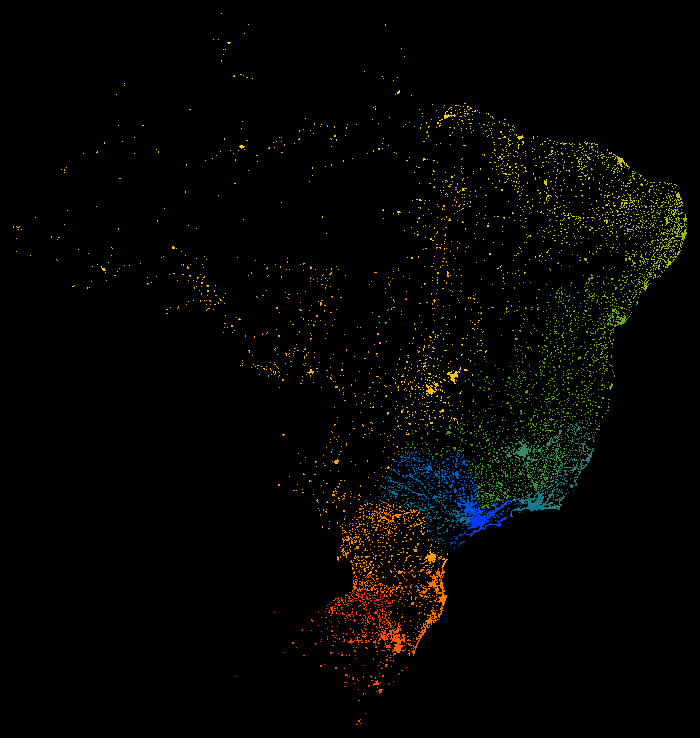

In [42]:
create_map(brazil, rainbow, ds.mean(agg_name),'brazil_zip_codes')

주의 우편 번호
지역 수준에서 우편 번호 접두사가 어떻게 작동하는지 알아보기 위해
##  상파울루(SP) 위치 찾기

- 상파울루 주의 우편번호 접두사 범위는 01001 ~ 19990
- 0으로 시작하는 우편번호는 상파울루 메트로 지역
- 1로 시작하는 우편번호는 주 내부

In [43]:
def filter_data(level, name):
    df = geolocation_data[geolocation_data[level] == name]
    #이상치 제거
    df = df[(df.x <= df.x.quantile(0.999)) & (df.x >= df.x.quantile(0.001))]
    df = df[(df.y <= df.y.quantile(0.999)) & (df.y >= df.y.quantile(0.001))]
    return df

In [44]:
# 상파울로
sp = filter_data('geolocation_state', 'SP')
agg_name = 'geolocation_zip_code_prefix'
sp[agg_name].describe().to_frame()

geolocation_zip_code_prefix
count                402651.000000
mean                   9030.831782
std                    5101.941134
min                    1001.000000
25%                    4661.000000
50%                    8257.000000
75%                   13330.000000
max                   19990.000000

In [45]:
plot_map(sp, 'Zip Codes in Sao Paulo State', ds.min(agg_name), agg_name, cmap=rainbow)

Output hidden; open in https://colab.research.google.com to view.

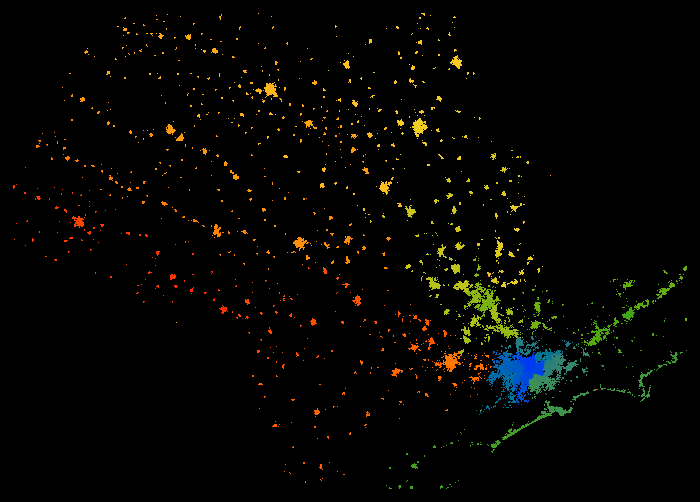

In [46]:
create_map(sp, rainbow, ds.mean(agg_name), 'sp_zip_codes')

대도시의 우편번호
## 상파울루 시에 우편번호

상파울루 시의 우편 번호 접두사는 01001에서 09540까지입니다.





In [47]:
saopaulo = filter_data('geolocation_city', 'sao paulo')
agg_name = 'geolocation_zip_code_prefix'
saopaulo[agg_name].describe().to_frame()

geolocation_zip_code_prefix
count                135256.000000
mean                   4137.454996
std                    1804.189554
min                    1001.000000
25%                    2941.000000
50%                    4166.000000
75%                    5158.000000
max                    9540.000000

In [48]:
plot_map(saopaulo, 'Zip Codes in Sao Paulo City', ds.min(agg_name), agg_name, cmap=rainbow)

Output hidden; open in https://colab.research.google.com to view.

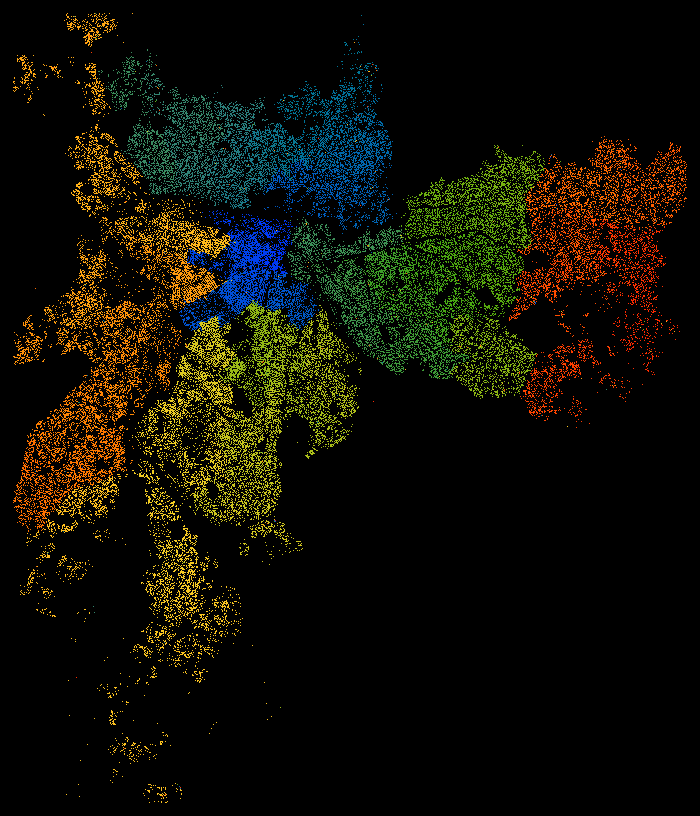

In [49]:
create_map(saopaulo, rainbow, ds.mean(agg_name), 'sao_paulo_zip_codes')

소도시의 우편번호
## 아티바 시

아티바 시의 우편번호 접두사는 12940 과 12954 사이이다.
하지만 같은 우편번호 접두사를 가진 다른 이웃 도시들도 있다.
더 자세한 내용을 알고싶으면 우편 번호(4번째와 5번째 숫자)가 더 필요하다.

In [50]:
atibaia = geolocation_data[geolocation_data['geolocation_city'] == 'atibaia']
agg_name = 'geolocation_zip_code_prefix'
atibaia[agg_name].describe().to_frame()

geolocation_zip_code_prefix
count                  1254.000000
mean                  12945.042265
std                       4.197704
min                   12940.000000
25%                   12942.000000
50%                   12944.000000
75%                   12948.000000
max                   12954.000000

In [51]:
plot_map(atibaia, 'Zip Codes in Atibaia', ds.min(agg_name), agg_name, cmap=rainbow)

Output hidden; open in https://colab.research.google.com to view.

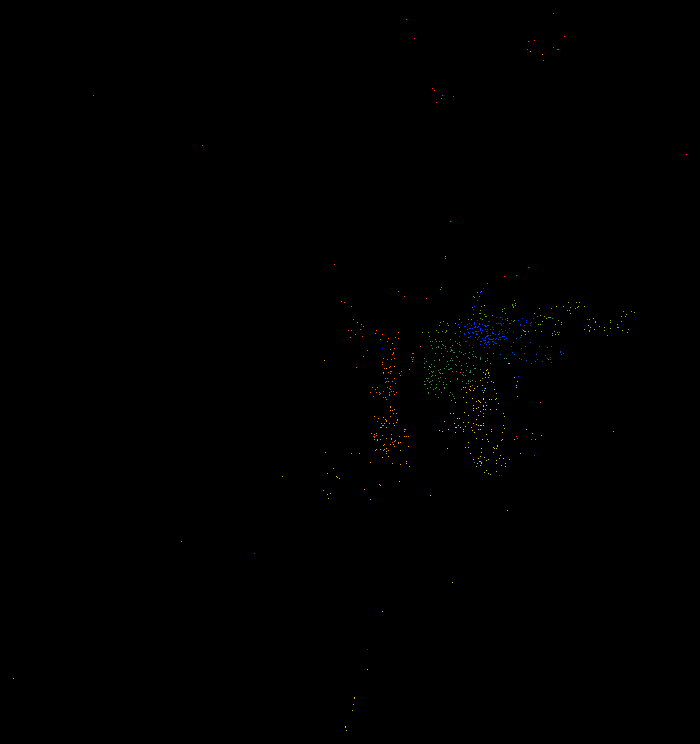

In [52]:
create_map(atibaia, rainbow, ds.mean(agg_name), 'atibaia_zip_codes')


## 우편 번호의 범위
우편번호의 모든 숫자는 무엇을 의미하나요? 1 ~ 5자리 사이의 동작 방식을 확인  

2로 시작하는 우편번호는 모두 리우데자네이루(RJ) 및 에스피리토 산토(ES) 주  
3으로 시작하는 우편번호는	미나스제라이스(MG)주

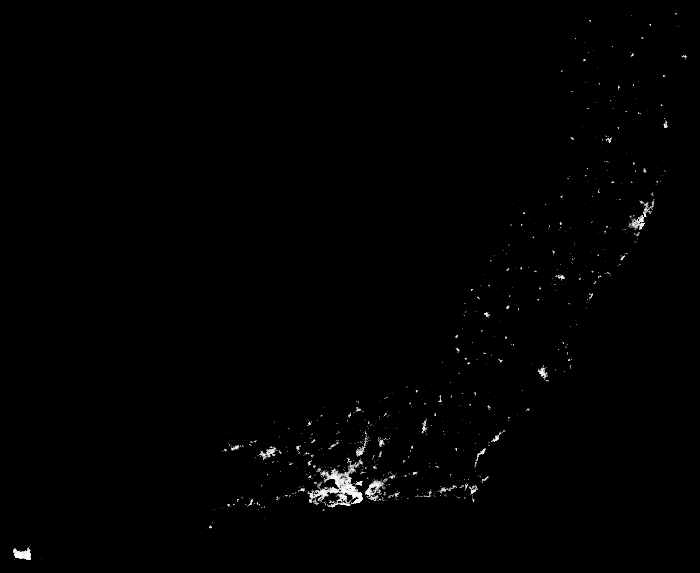

In [53]:
# Zip code: 2
# 리우데자네이루(RJ) 및 에스피리토 산토(ES) 주
df = filter_data('geolocation_zip_code_prefix_Region', 2)
create_map(df, cm(Greys9), ds.count(), 'zip_code_2')

29로 시작하는 우편번호는 모두 에스피리토 산토(ES) 주 내에 있지만 여러 지역을 나타난다.

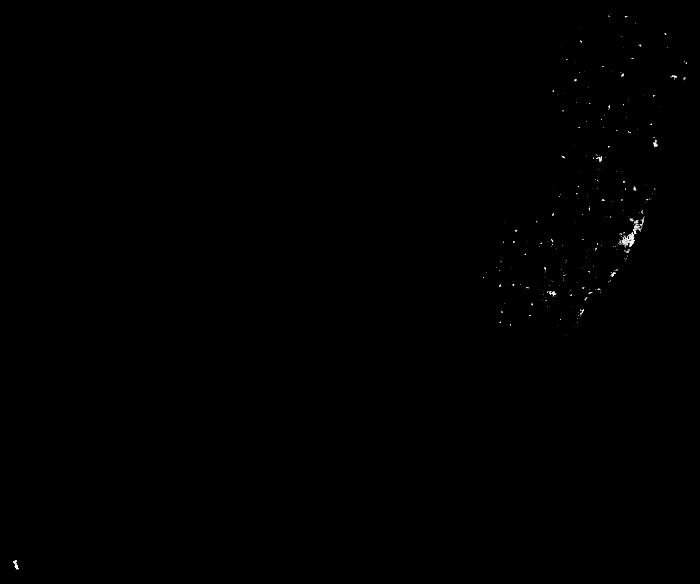

In [54]:
# Zip code: 29
df = filter_data('geolocation_zip_code_prefix_Subregion', 29)
create_map(df, cm(Greys9), ds.count(), 'zip_code_29')

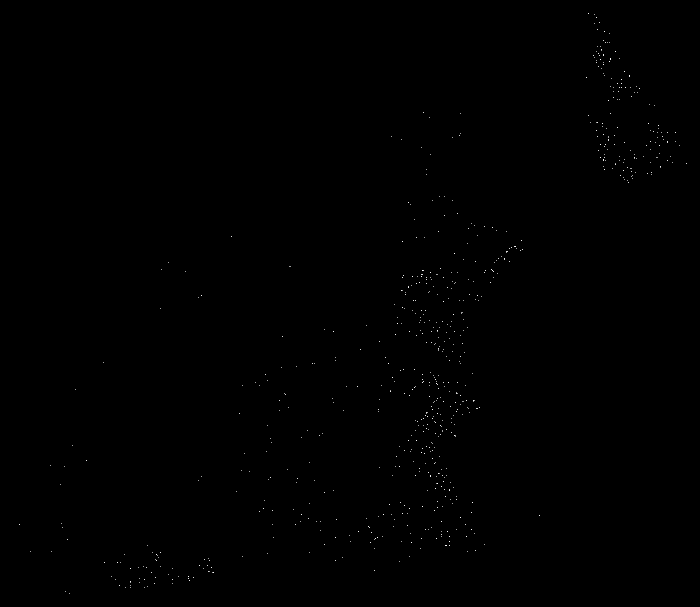

In [55]:
# Zip code: 290
df = filter_data('geolocation_zip_code_prefix_Sector', 290)
create_map(df, cm(Greys9), ds.count(), 'zip_code_290')


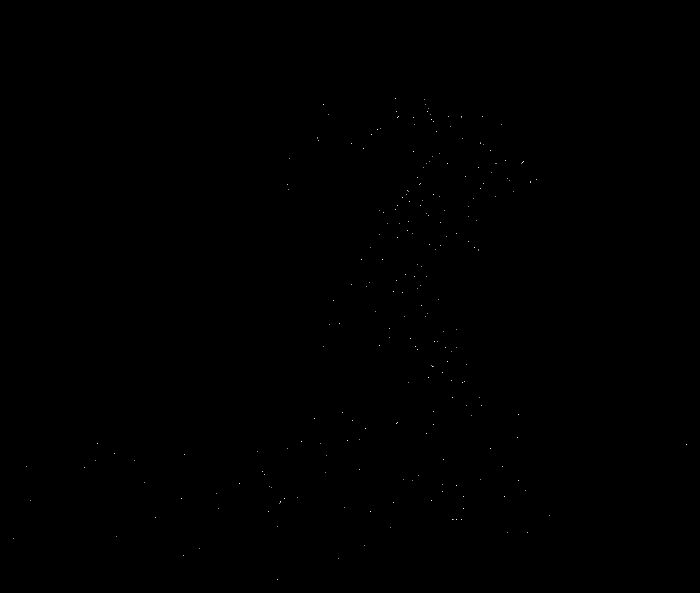

In [56]:
# Zip code: 2905
df = filter_data('geolocation_zip_code_prefix_Subsector', 2905)
create_map(df, cm(Greys9), ds.count(), 'zip_code_2205')

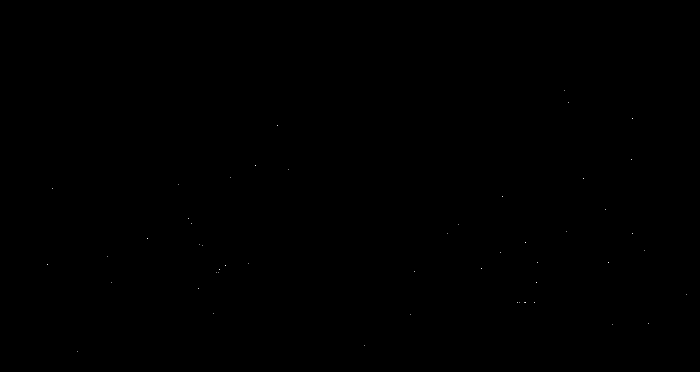

In [57]:
# Zip code: 29050
df = filter_data('geolocation_zip_code_prefix', 29050)
create_map(df, cm(Greys9), ds.count(), 'zip_code_29050')


따라서 우편 번호의 수를 늘리면 데이터의 하위 집합을 선택할 수 있다.

## 지역별 수익

우편번호 5자리로 작업하면 일부 지역에서 매우 작은 샘플로 이어질 수 있으므로 3자리로 작업  
우편번호 접두사별로 분류된 제품 가치의 합계를 그림으로 표시하면 대부분의 수익이 브라질 남동부와 남부 지역에서 발생했음을 알 수 있다. 인구가 더 많은 대도시와 수도가 수익에 더 많이 참여하는 것도 확인할 수 있다.


## < 사용한 데이터셋 >
orders_data

order_items_data  

order_reviews_data 

customers_data

In [58]:
customers_data = customers_data.astype({'customer_zip_code_prefix': str})

# 우편번호 앞자리 3개만 가져오기. 
customers_data['customer_zip_code_prefix_Sector'] = customers_data['customer_zip_code_prefix'].str[0:3]
customers_data['customer_zip_code_prefix_Sector'] = customers_data['customer_zip_code_prefix_Sector'].astype(int)
# 브라질 우편 번호 앞자리 3개인 Sector를 인덱스로 하는 datset을 복사.
brazil_geo = geolocation_data.set_index('geolocation_zip_code_prefix_Sector').copy()


In [60]:
# merging the data
orders = orders_data.merge(order_items_data, on='order_id')
orders = orders.merge(customers_data, on='customer_id')
orders = orders.merge(order_reviews_data, on='order_id')

In [62]:
# 소비자의 우편번호를 기준으로 소비 가격 합하기.
gp = orders.groupby('customer_zip_code_prefix_Sector')['price'].sum().to_frame()
# 소비 가격 합한 것 우편번호 기준으로 join
revenue = brazil_geo.join(gp)
agg_name = 'revenue'
revenue[agg_name] = revenue.price / 1000 

In [64]:
# 수익
plot_map(revenue, 'Orders Revenue (thousands R$)', ds.mean(agg_name), agg_name, cmap=fire)

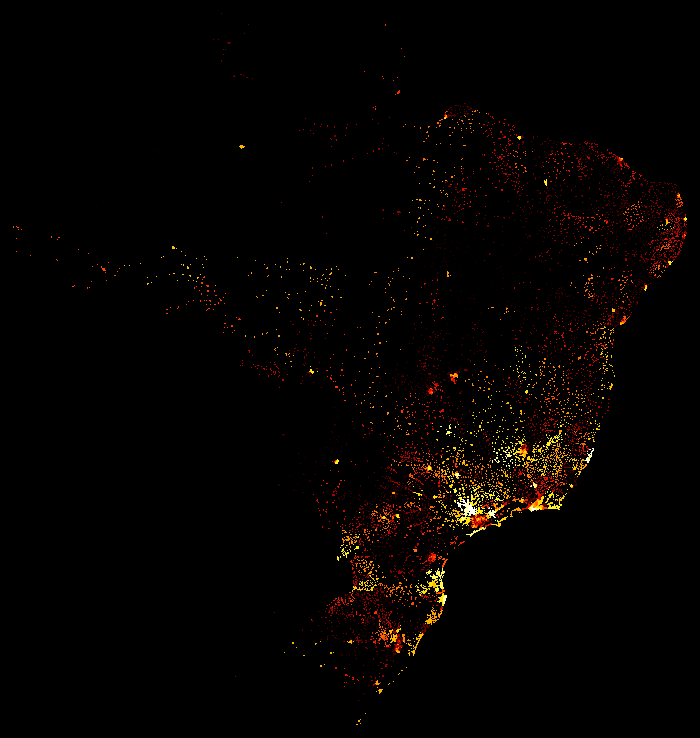

In [65]:
create_map(revenue, fire, ds.mean(agg_name), 'revenue_brazil')

## 평균 구매가격 얼마입니까?
브라질 남부 및 남동부 지역의 고객들은 북부 및 북동부 지역의 다른 고객들보다 평균 구매가격이 더 낮습니다.

In [66]:
gp = orders.groupby('order_id').agg({'price': 'sum', 'customer_zip_code_prefix_Sector': 'max'})
gp = gp.groupby('customer_zip_code_prefix_Sector')['price'].mean().to_frame()
avg_ticket = brazil_geo.join(gp)
agg_name = 'avg_ticket'
avg_ticket[agg_name] = avg_ticket.price

In [67]:
plot_map(avg_ticket, 'Orders Average Ticket (R$)', ds.mean(agg_name), agg_name, cmap=bgy)

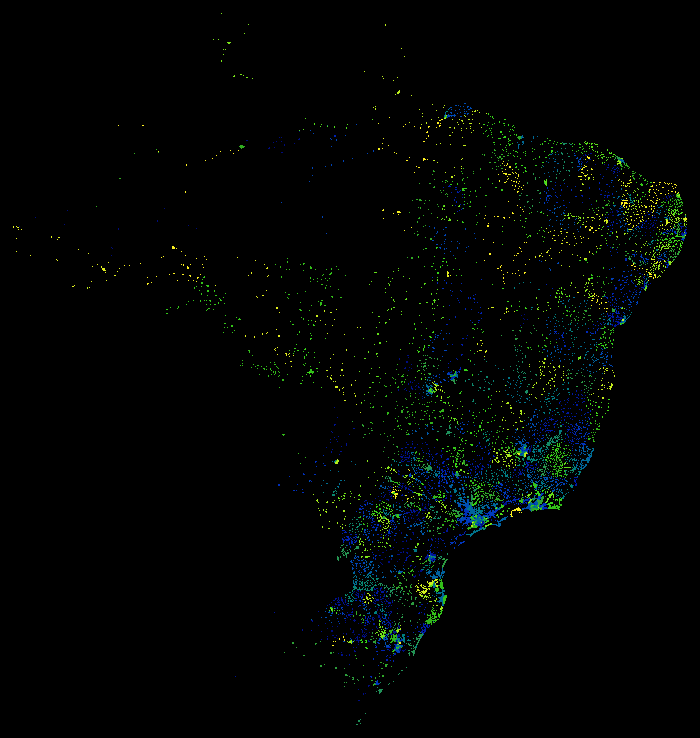

In [68]:
create_map(avg_ticket, bgy, ds.mean('avg_ticket'), 'avg_ticket_brazil')

## 누가 배송비를 더 많이 내나요?
배송비를 주문비로 나누면 운송 비율을 찾을 수 있습니다. 이 비율은 주문품을 배달하기 위해 사람이 지불해야 했던 제품 가격의 백분율  
예를 들어, 제품의 가격이 50.00이고 배송비가 10.00인 경우 운송 비율은 0.2 또는 20%입니다.  
높은 운임 비율은 고객들이 구매를 완료하지 못하게 할 가능성이 매우 높다.  
물류 비용 때문에 인구 밀도가 높은 지역에서는 낮은 운임 비율이, 희박한 지역에서는 높은 운임 비율이 예상된다.

In [69]:
gp = orders.groupby('order_id').agg({'price': 'sum', 'freight_value': 'sum', 'customer_zip_code_prefix_Sector': 'max'})
agg_name = 'freight_ratio'
gp[agg_name] = gp.freight_value / gp.price
gp = gp.groupby('customer_zip_code_prefix_Sector')[agg_name].mean().to_frame()
freight_ratio = brazil_geo.join(gp)

In [70]:
plot_map(freight_ratio, 'Orders Average Freight Ratio', ds.mean(agg_name), agg_name, cmap=bgy)

Output hidden; open in https://colab.research.google.com to view.

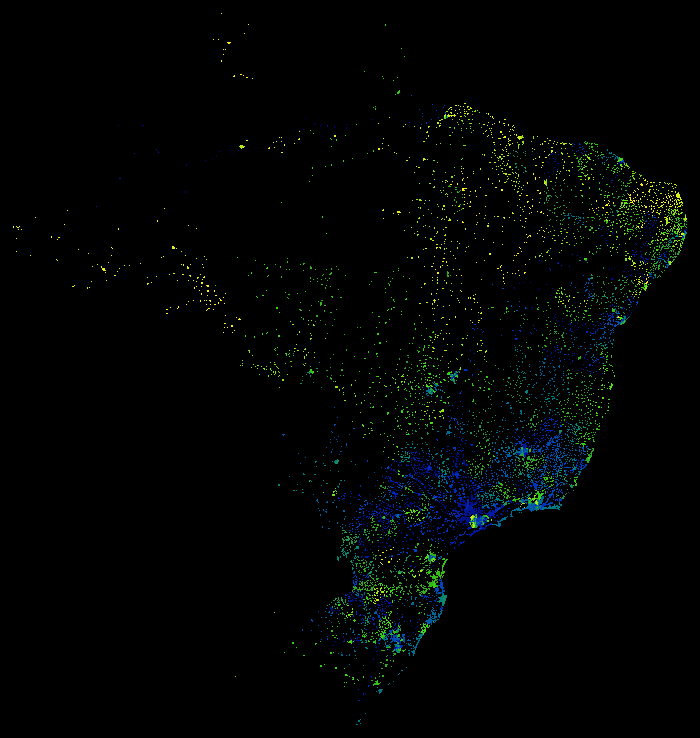

In [71]:
create_map(freight_ratio, bgy, ds.mean('freight_ratio'), 'freight_ratio_brazil')

## 평균 배송 시간
브라질의 북쪽과 북동쪽에 사는 사람들은 더 높은 운송비를 부담해야 하고  
구매를 받기 위해 더 오래 기다려야 한다.

In [72]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date) # 배송 시작일
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date) # 예상된 배송 도착일
orders['order_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date) # 배송 도착일
# 배송완료된 날자에서 배송이 옮겨지기 시작한 날짜를 빼면 배송 소요일 
orders['actual_delivery_time'] = orders.order_delivered_customer_date - orders.order_delivered_carrier_date
orders['actual_delivery_time'] = orders['actual_delivery_time'].dt.days

In [73]:
gp = orders.groupby('customer_zip_code_prefix_Sector')['actual_delivery_time'].mean().to_frame()
delivery_time = brazil_geo.join(gp)
agg_name = 'avg_delivery_time'
delivery_time[agg_name] = delivery_time['actual_delivery_time']

In [74]:
delivery_time

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
100                         1009       -23.546935       -46.636588   
100                         1009       -23.545430       -46.635715   
100                         1007       -23.550393       -46.637302   
100                         1005       -23.549819       -46.635606   
100                         1009       -23.545692       -46.635866   
..                           ...              ...              ...   
999                        99950       -28.068639       -52.010705   
999                        99900       -27.877125       -52.224882   
999                        99950       -28.071855       -52.014716   
999                        99980       -28.388932       -51.846871   
999                        99950       -28.070104       -52.018658   

    geolocation_city geolocation_state  geolocation_zip_code_prefix_Region  \
100        sao paulo                SP                                   1   
100        sao paulo                SP                                   1   
100        sao paulo                SP                                   1   
100        sao paulo                SP                                   1   
100        sao paulo                SP                                   1   
..               ...               ...                                 ...   
999         tapejara                RS                                   9   
999   getulio vargas                RS                                   9   
999         tapejara                RS                                   9   
999  david canabarro                RS                                   9   
999         tapejara                RS                                   9   

     geolocation_zip_code_prefix_Subregion  \
100                                     10   
100                                     10   
100                                     10   
100                                     10   
100                                     10   
..                                     ...   
999                                     99   
999                                     99   
999                                     99   
999                                     99   
999                                     99   

     geolocation_zip_code_prefix_Subsector             x             y  \
100                                   1009 -5.191561e+06 -2.698297e+06   
100                                   1009 -5.191464e+06 -2.698114e+06   
100                                   1007 -5.191641e+06 -2.698716e+06   
100                                   1005 -5.191452e+06 -2.698647e+06   
100                                   1009 -5.191481e+06 -2.698146e+06   
..                                     ...           ...           ...   
999                                   9995 -5.789805e+06 -3.257630e+06   
999                                   9990 -5.813647e+06 -3.233491e+06   
999                                   9995 -5.790252e+06 -3.258036e+06   
999                                   9998 -5.771567e+06 -3.298098e+06   
999                                   9995 -5.790690e+06 -3.257815e+06   

     actual_delivery_time  avg_delivery_time  
100              2.807692           2.807692  
100              2.807692           2.807692  
100              2.807692           2.807692  
100              2.807692           2.807692  
100              2.807692           2.807692  
..                    ...                ...  
999              7.922078           7.922078  
999              7.922078           7.922078  
999              7.922078           7.922078  
999              7.922078           7.922078  
999              7.922078           7.922078  

[1000121 rows x 12 columns]

In [75]:
plot_map(delivery_time, 'Orders Average Delivery Time (days)', ds.mean(agg_name), agg_name, cmap=bjy)

Output hidden; open in https://colab.research.google.com to view.

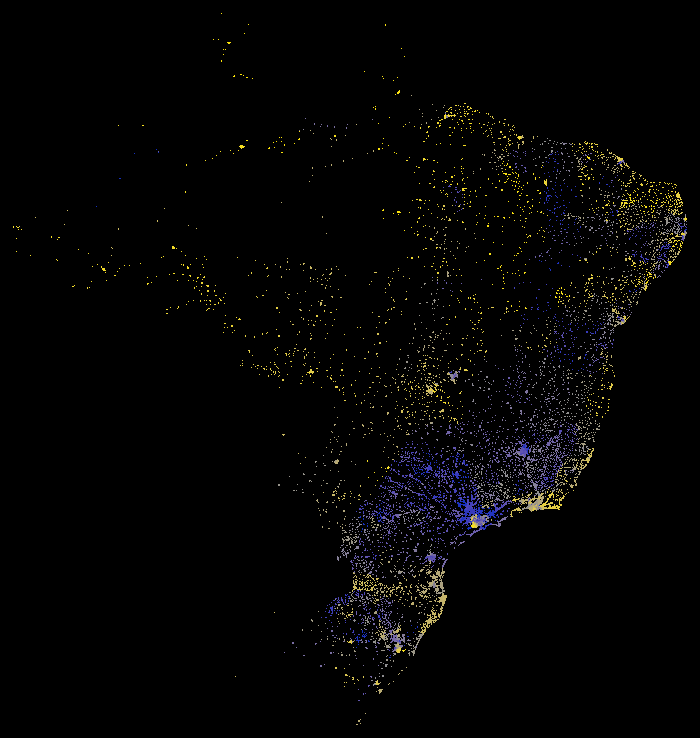

In [76]:
create_map(delivery_time, bjy, ds.mean(agg_name), 'avg_delivery_time_brazil')


주 별로 봤을 때, 파라나 주(PR)에서 볼 수 있듯이 대도시가 소도시에 비해 평균 배송시간이 짧다는 것을 알 수 있다.

In [77]:
pr = filter_data('geolocation_state', 'PR').set_index('geolocation_zip_code_prefix_Sector')
gp = orders.groupby('customer_zip_code_prefix_Sector')['actual_delivery_time'].mean().to_frame()
pr_delivery_time = pr.join(gp)
pr_delivery_time[agg_name] = pr_delivery_time['actual_delivery_time']

In [78]:
plot_map(pr_delivery_time, 'Orders Average Delivery Time in Parana State (days)', ds.mean(agg_name), agg_name, cmap=bjy)


Output hidden; open in https://colab.research.google.com to view.

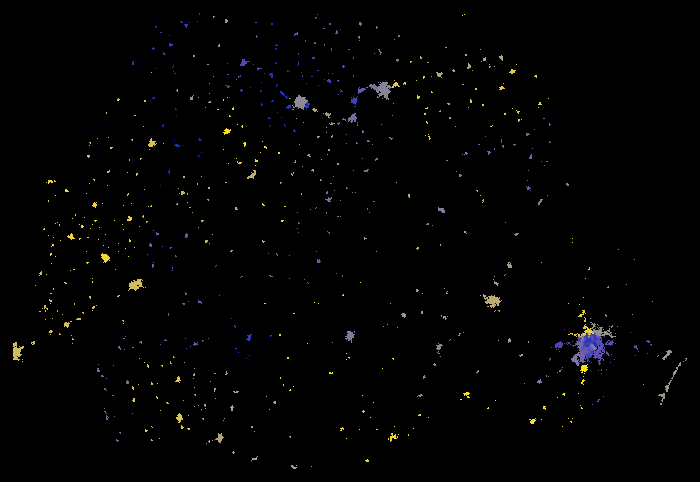

In [79]:
create_map(pr_delivery_time, bjy, ds.mean(agg_name), 'avg_delivery_time_pr')


## 브라질 교외
다른 나라들과 달리, 브라질에서 가장 부유한 지역은 보통 도심 근처이고 교외는 빈곤과 폭력률이 높다고 한다. 

In [80]:
riodejaneiro = filter_data('geolocation_city', 'rio de janeiro').set_index('geolocation_zip_code_prefix_Sector')
gp = orders.groupby('customer_zip_code_prefix_Sector')['actual_delivery_time'].mean().to_frame()
rj_delivery_time = riodejaneiro.join(gp)
rj_delivery_time[agg_name] = rj_delivery_time['actual_delivery_time']

In [81]:
rj_delivery_time

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
200                        20010       -22.902472       -43.174059   
200                        20011       -22.904813       -43.176236   
200                        20021       -22.909710       -43.171322   
200                        20030       -22.908640       -43.174012   
200                        20030       -22.910499       -43.172442   
..                           ...              ...              ...   
235                        23555       -22.911883       -43.693643   
235                        23570       -22.911644       -43.679006   
235                        23573       -22.913101       -43.652689   
249                        24900       -22.862772       -43.491958   
265                        26520       -22.888132       -43.643660   

    geolocation_city geolocation_state  geolocation_zip_code_prefix_Region  \
200   rio de janeiro                RJ                                   2   
200   rio de janeiro                RJ                                   2   
200   rio de janeiro                RJ                                   2   
200   rio de janeiro                RJ                                   2   
200   rio de janeiro                RJ                                   2   
..               ...               ...                                 ...   
235   rio de janeiro                RJ                                   2   
235   rio de janeiro                RJ                                   2   
235   rio de janeiro                RJ                                   2   
249   rio de janeiro                RJ                                   2   
265   rio de janeiro                RJ                                   2   

     geolocation_zip_code_prefix_Subregion  \
200                                     20   
200                                     20   
200                                     20   
200                                     20   
200                                     20   
..                                     ...   
235                                     23   
235                                     23   
235                                     23   
249                                     24   
265                                     26   

     geolocation_zip_code_prefix_Subsector             x             y  \
200                                   2001 -4.806114e+06 -2.620229e+06   
200                                   2001 -4.806357e+06 -2.620511e+06   
200                                   2002 -4.805810e+06 -2.621103e+06   
200                                   2003 -4.806109e+06 -2.620974e+06   
200                                   2003 -4.805934e+06 -2.621199e+06   
..                                     ...           ...           ...   
235                                   2355 -4.863954e+06 -2.621366e+06   
235                                   2357 -4.862325e+06 -2.621337e+06   
235                                   2357 -4.859395e+06 -2.621513e+06   
249                                   2490 -4.841503e+06 -2.615432e+06   
265                                   2652 -4.858390e+06 -2.618496e+06   

     actual_delivery_time  avg_delivery_time  
200              7.692884           7.692884  
200              7.692884           7.692884  
200              7.692884           7.692884  
200              7.692884           7.692884  
200              7.692884           7.692884  
..                    ...                ...  
235             10.884477          10.884477  
235             10.884477          10.884477  
235             10.884477          10.884477  
249             12.326531          12.326531  
265             10.023810          10.023810  

[61900 rows x 12 columns]

In [82]:
plot_map(rj_delivery_time, 'Orders Average Delivery Time in Rio de Janeiro (days)', ds.mean(agg_name), agg_name, cmap=bjy)

Output hidden; open in https://colab.research.google.com to view.

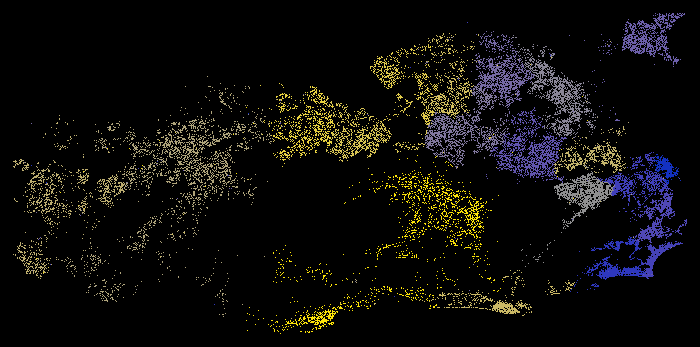

In [83]:
create_map(rj_delivery_time, bjy, ds.mean(agg_name), 'rio_de_janeiro_avg_delivery_time')


다운타운, 보타포고, 코파카바나, 플라멩고와 같은 부유한 동네에 살면  
시다데 데우스나 뱅구 같은 가난한 동네에 사는 사람보다 5일 일찍 주문을 받을 가능성이 높은 것으로 나타났다.  
상파울루와 포르투 알레그레에서도 같은 패턴을 볼 수 있습니다. 도심 근처의 고객들은 교외에 사는 고객들보다 주문을 더 빨리 받는다.

In [84]:
saopaulo = filter_data('geolocation_city', 'sao paulo').set_index('geolocation_zip_code_prefix_Sector')
gp = orders.groupby('customer_zip_code_prefix_Sector')['actual_delivery_time'].mean().to_frame()
sp_delivery_time = saopaulo.join(gp)
sp_delivery_time[agg_name] = sp_delivery_time['actual_delivery_time']

In [85]:
plot_map(sp_delivery_time, 'Orders Average Delivery Time in Sao Paulo (days)', ds.mean(agg_name), agg_name, cmap=bjy)

Output hidden; open in https://colab.research.google.com to view.

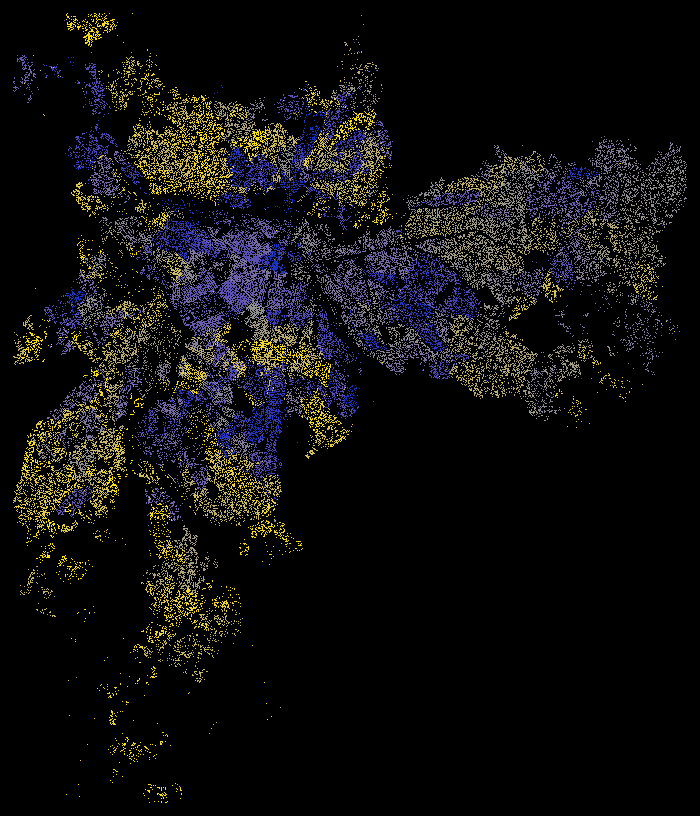

In [86]:
create_map(sp_delivery_time, bjy, ds.mean(agg_name), 'sao_paulo_avg_delivery_time')

In [87]:
poa = filter_data('geolocation_city', 'porto alegre').set_index('geolocation_zip_code_prefix_Sector')
gp = orders.groupby('customer_zip_code_prefix_Sector')['actual_delivery_time'].mean().to_frame()
poa_delivery_time = poa.join(gp)
poa_delivery_time[agg_name] = poa_delivery_time['actual_delivery_time']

In [88]:
plot_map(poa_delivery_time, 'Orders Average Delivery Time in Porto Alegre (days)', ds.mean(agg_name), agg_name, cmap=bjy)

Output hidden; open in https://colab.research.google.com to view.

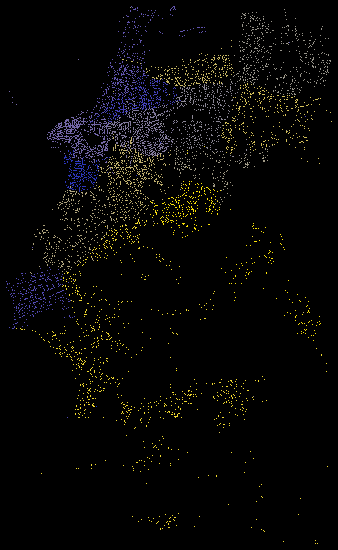

In [89]:
create_map(poa_delivery_time, bjy, ds.mean(agg_name), 'poa_avg_delivery_time')

## 주문 리뷰 평균
리우데자네이루 주와 북동부 지역의 고객들은 구매 시 낮은 점수를 줄 가능성이 높습니다.

In [90]:
gp = orders.groupby('customer_zip_code_prefix_Sector')['review_score'].mean().to_frame()
score = brazil_geo.join(gp)
agg_name = 'avg_score'
score[agg_name] = score['review_score']

In [91]:
plot_map(score, 'Orders Average Review Score', ds.mean(agg_name), agg_name, cmap=bgy)

Output hidden; open in https://colab.research.google.com to view.

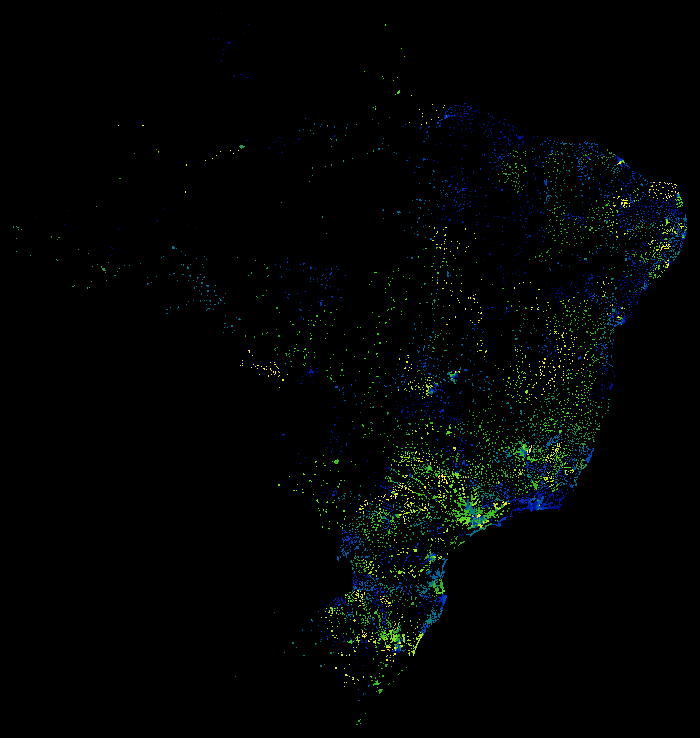

In [92]:
create_map(score, bgy, ds.mean(agg_name), 'avg_review_score_brazil')

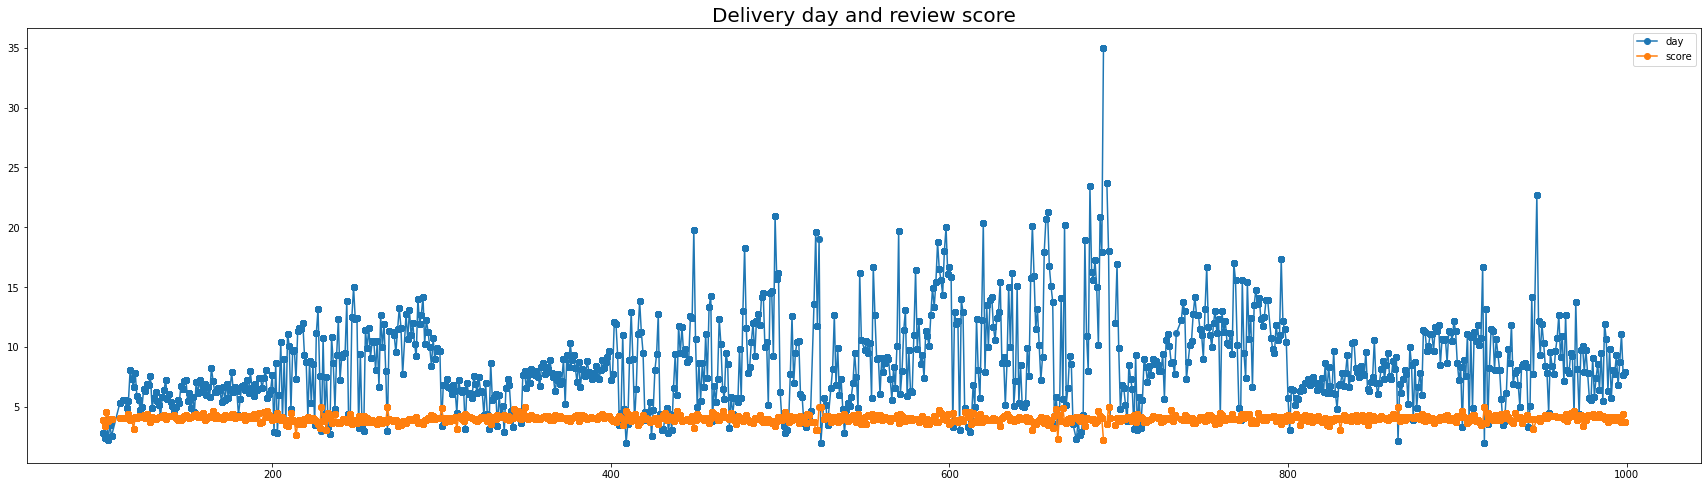

In [93]:
a_visits = delivery_time['actual_delivery_time']
b_visits = score['review_score']

fig = plt.figure(figsize=(30,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(a_visits,marker='o',label='day') ## 선그래프 생성
ax.plot(b_visits,marker='o',label='score')

ax.legend() ## 범례

plt.title('Delivery day and review score',fontsize=20) ## 타이틀 설정
plt.show()

##### 상관계수 분석 결과

In [ ]:
from scipy import stats

print(stats.pearsonr(a_visits, b_visits))
print(stats.spearmanr(a_visits, b_visits))
print(stats.kendalltau(a_visits, b_visits))
```

(-0.8064416733095765, 0.0)   
SpearmanrResult(correlation=-0.82741722924642, pvalue=0.0)   
KendalltauResult(correlation=-0.646018868756404, pvalue=0.0)   
   
음의 상관관계가 상당히 강한것으로 나왔습니다. pvalue는 0에 매우 가까워서 신뢰도가 높습니다.

## 리우데자네이루의 평균 리뷰 점수를 자세히 보면, 평균 배송 시간과 어떤 관계가 있을까요?


In [94]:
rj_score = riodejaneiro.join(gp)
rj_score[agg_name] = rj_score['review_score']

In [95]:
rj_score

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
200                        20010       -22.902472       -43.174059   
200                        20011       -22.904813       -43.176236   
200                        20021       -22.909710       -43.171322   
200                        20030       -22.908640       -43.174012   
200                        20030       -22.910499       -43.172442   
..                           ...              ...              ...   
235                        23555       -22.911883       -43.693643   
235                        23570       -22.911644       -43.679006   
235                        23573       -22.913101       -43.652689   
249                        24900       -22.862772       -43.491958   
265                        26520       -22.888132       -43.643660   

    geolocation_city geolocation_state  geolocation_zip_code_prefix_Region  \
200   rio de janeiro                RJ                                   2   
200   rio de janeiro                RJ                                   2   
200   rio de janeiro                RJ                                   2   
200   rio de janeiro                RJ                                   2   
200   rio de janeiro                RJ                                   2   
..               ...               ...                                 ...   
235   rio de janeiro                RJ                                   2   
235   rio de janeiro                RJ                                   2   
235   rio de janeiro                RJ                                   2   
249   rio de janeiro                RJ                                   2   
265   rio de janeiro                RJ                                   2   

     geolocation_zip_code_prefix_Subregion  \
200                                     20   
200                                     20   
200                                     20   
200                                     20   
200                                     20   
..                                     ...   
235                                     23   
235                                     23   
235                                     23   
249                                     24   
265                                     26   

     geolocation_zip_code_prefix_Subsector             x             y  \
200                                   2001 -4.806114e+06 -2.620229e+06   
200                                   2001 -4.806357e+06 -2.620511e+06   
200                                   2002 -4.805810e+06 -2.621103e+06   
200                                   2003 -4.806109e+06 -2.620974e+06   
200                                   2003 -4.805934e+06 -2.621199e+06   
..                                     ...           ...           ...   
235                                   2355 -4.863954e+06 -2.621366e+06   
235                                   2357 -4.862325e+06 -2.621337e+06   
235                                   2357 -4.859395e+06 -2.621513e+06   
249                                   2490 -4.841503e+06 -2.615432e+06   
265                                   2652 -4.858390e+06 -2.618496e+06   

     review_score  avg_score  
200      3.937037   3.937037  
200      3.937037   3.937037  
200      3.937037   3.937037  
200      3.937037   3.937037  
200      3.937037   3.937037  
..            ...        ...  
235      3.703180   3.703180  
235      3.703180   3.703180  
235      3.703180   3.703180  
249      3.881579   3.881579  
265      3.647887   3.647887  

[61900 rows x 12 columns]

In [96]:
plot_map(rj_score, 'Orders Average Review Score in Rio de Janeiro', ds.mean(agg_name), agg_name, cmap=bgy)

Output hidden; open in https://colab.research.google.com to view.

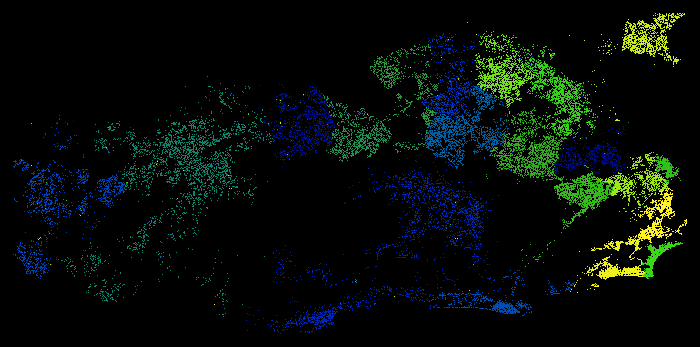

In [97]:
create_map(rj_score, bgy, ds.mean(agg_name), 'rio_de_janeiro_score')

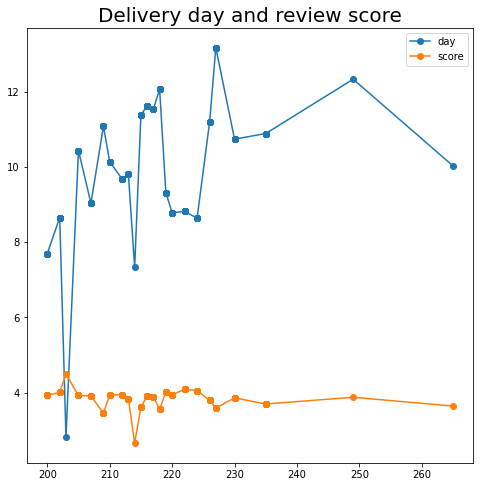

In [98]:
a_visits = rj_delivery_time['actual_delivery_time']
b_visits = rj_score['review_score']

fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(a_visits,marker='o',label='day') ## 선그래프 생성
ax.plot(b_visits,marker='o',label='score')

ax.legend() ## 범례

plt.title('Delivery day and review score',fontsize=20) ## 타이틀 설정
plt.show()

## 지연된 주문
지연된 주문의 비율을 측정하여 고객의 리뷰 점수와 어떤 관계가 있을까요?

In [99]:
# 배송 에측일보다 배송 완료일이 더 크면 지연된 배송
orders['is_delayed'] = orders['order_delivered_customer_date'] > orders['order_estimated_delivery_date'] 
gp = orders.groupby('customer_zip_code_prefix_Sector').agg({'is_delayed': ['sum', 'count']})
agg_name = 'delayed'
# 지연 비율
gp[agg_name] = gp['is_delayed']['sum'] / gp['is_delayed']['count']
gp = gp[agg_name]
order_delay = brazil_geo.join(gp)

In [100]:
plot_map(order_delay, 'Orders Delay Percentage in Brazil', ds.mean(agg_name), agg_name, cmap=bgy)

Output hidden; open in https://colab.research.google.com to view.

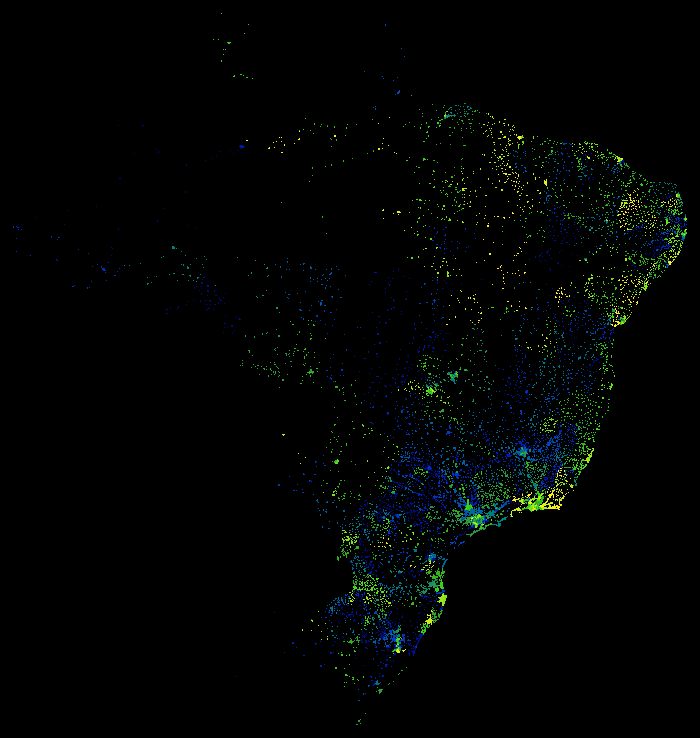

In [101]:
create_map(order_delay, bgy, ds.mean(agg_name), 'brazil_order_delay_percentage')


리오데자네이루를 다시 한 번 보고 주문 배송이 지연될 가능성이 더 높은 곳을 살펴본다.

In [102]:
rj_delay = riodejaneiro.join(gp)


In [103]:
plot_map(rj_delay, 'Orders Delay Percentage in Rio de Janeiro', ds.mean(agg_name), agg_name, cmap=bgy)

Output hidden; open in https://colab.research.google.com to view.

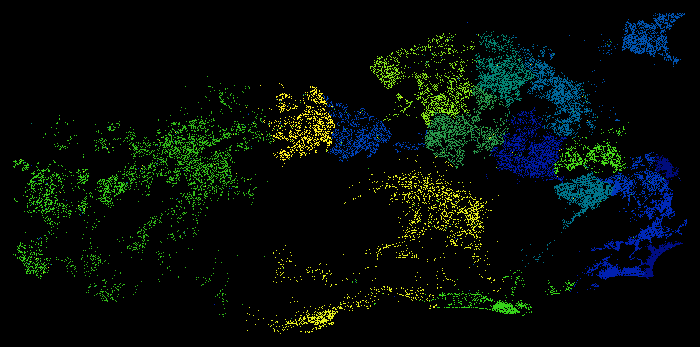

In [104]:
create_map(rj_delay, bgy, ds.mean(agg_name), 'rio_de_janeiro_order_delay_percentage')

작은 마을의 고객은 한 번 주문하면 더 많은 물건을 주문할까?  
대도시에 더 멀리 있는 고객들이 대량으로 구매하는지 주문당 평균 품목 수량을 확인해보자.

In [105]:
orders['count'] = 1
gp = orders.groupby(['customer_zip_code_prefix_Sector','order_id'], as_index=False)['count'].count()
gp = gp.groupby('customer_zip_code_prefix_Sector')['count'].mean().to_frame()
avg_qty = brazil_geo.join(gp)
agg_name = 'avg_qty'
avg_qty[agg_name] = avg_qty['count']

In [106]:
plot_map(avg_qty, 'Average Item Quantity', ds.mean(agg_name), agg_name, cmap=bgy)

Output hidden; open in https://colab.research.google.com to view.

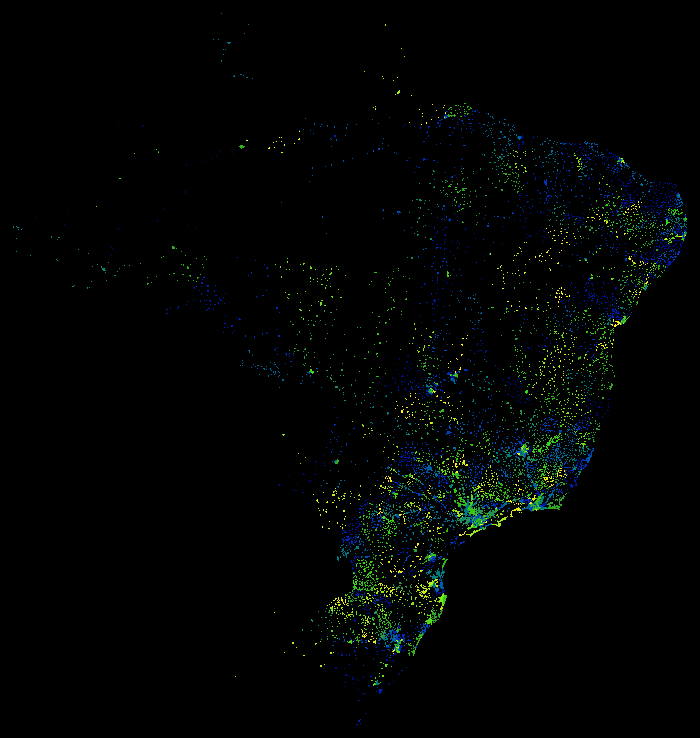

In [107]:
create_map(avg_qty, bgy, ds.mean(agg_name), 'avg_qty_items')

분명히 그 가설은 거짓이다. 대도시의 고객들은 주문당 더 많은 제품을 사는 것 같다.  
하지만 더 이상의 결론을 내릴 수 있는 명확한 지리적 패턴이 없습니다.

In [108]:

orders['diff_estimated_delivery'] = orders.order_delivered_customer_date - orders.order_estimated_delivery_date
orders['diff_estimated_delivery'] = orders['diff_estimated_delivery'].dt.days
# Grouping data by state
states_avg_grouped = orders.groupby(by='customer_state', as_index=False).mean()
states_freight_paid = states_avg_grouped.loc[:, ['customer_state', 'freight_value']]
states_time_to_delivery = states_avg_grouped.loc[:, ['customer_state', 'actual_delivery_time']]
states_estimated_delivery = states_avg_grouped.loc[:, ['customer_state', 'diff_estimated_delivery']]

# Sorting data
states_freight_paid = states_freight_paid.sort_values(by='freight_value', ascending=False)
states_time_to_delivery = states_time_to_delivery.sort_values(by='actual_delivery_time', ascending=False)
states_estimated_delivery = states_estimated_delivery.sort_values(by='diff_estimated_delivery')

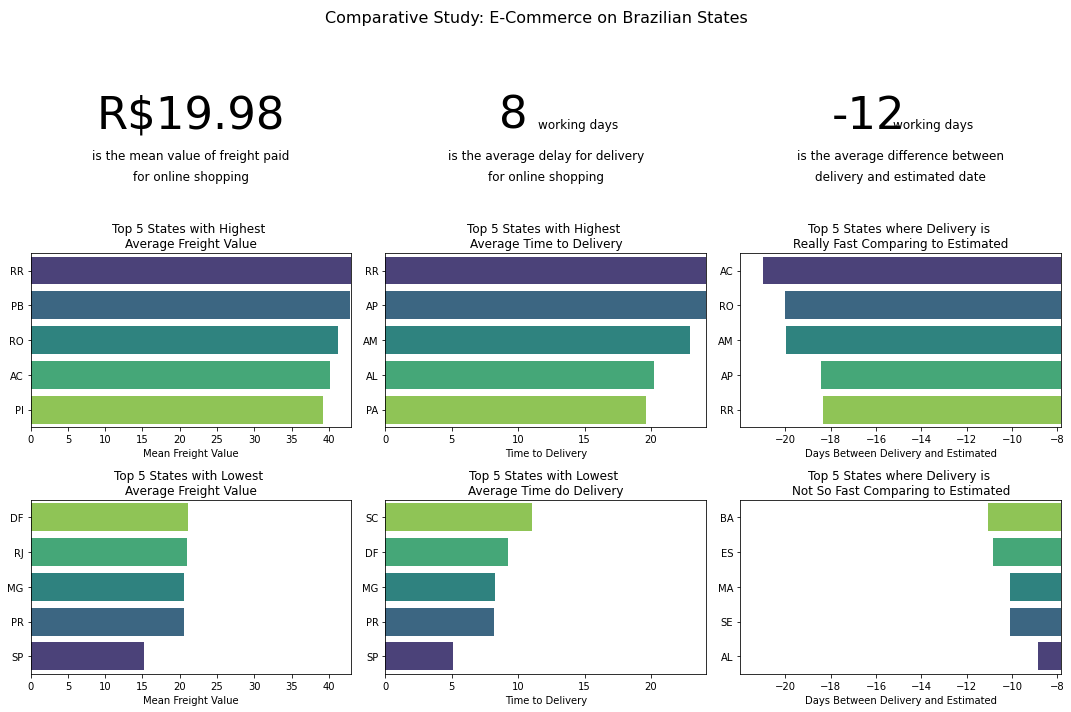

In [109]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Plot Pack 01 - Freight value paid on states
sns.barplot(x='freight_value', y='customer_state', data=states_freight_paid.head(), ax=axs[1, 0], palette='viridis')
axs[1, 0].set_title('Top 5 States with Highest \nAverage Freight Value', size=12, color='black')
sns.barplot(x='freight_value', y='customer_state', data=states_freight_paid.tail(), ax=axs[2, 0], palette='viridis_r')
axs[2, 0].set_title('Top 5 States with Lowest \nAverage Freight Value', size=12, color='black')
for ax in axs[1, 0], axs[2, 0]:
    ax.set_xlabel('Mean Freight Value')
    ax.set_xlim(0, states_freight_paid['freight_value'].max())
    #format_spines(ax, right_border=False)
    ax.set_ylabel('')

# Annotations
axs[0, 0].text(0.50, 0.30, f'R${round(orders.freight_value.mean(), 2)}', fontsize=45, ha='center')
axs[0, 0].text(0.50, 0.12, 'is the mean value of freight paid', fontsize=12, ha='center')
axs[0, 0].text(0.50, 0.00, 'for online shopping', fontsize=12, ha='center')
axs[0, 0].axis('off')

# Plot Pack 02 - Time to delivery on states
sns.barplot(x='actual_delivery_time', y='customer_state', data=states_time_to_delivery.head(), ax=axs[1, 1], palette='viridis')
axs[1, 1].set_title('Top 5 States with Highest \nAverage Time to Delivery', size=12, color='black')
sns.barplot(x='actual_delivery_time', y='customer_state', data=states_time_to_delivery.tail(), ax=axs[2, 1], palette='viridis_r')
axs[2, 1].set_title('Top 5 States with Lowest \nAverage Time do Delivery', size=12, color='black')
for ax in axs[1, 1], axs[2, 1]:
    ax.set_xlabel('Time to Delivery')
    ax.set_xlim(0, states_time_to_delivery['actual_delivery_time'].max())
    #format_spines(ax, right_border=False)
    ax.set_ylabel('')
    
# Annotations
axs[0, 1].text(0.40, 0.30, f'{int(orders.actual_delivery_time.mean())}', fontsize=45, ha='center')
axs[0, 1].text(0.60, 0.30, 'working days', fontsize=12, ha='center')
axs[0, 1].text(0.50, 0.12, 'is the average delay for delivery', fontsize=12, ha='center')
axs[0, 1].text(0.50, 0.00, 'for online shopping', fontsize=12, ha='center')
axs[0, 1].axis('off')
    
# Plot Pack 03 - Differnece between delivered and estimated on states
sns.barplot(x='diff_estimated_delivery', y='customer_state', data=states_estimated_delivery.head(), ax=axs[1, 2], palette='viridis')
axs[1, 2].set_title('Top 5 States where Delivery is \nReally Fast Comparing to Estimated', size=12, color='black')
sns.barplot(x='diff_estimated_delivery', y='customer_state', data=states_estimated_delivery.tail(), ax=axs[2, 2], palette='viridis_r')
axs[2, 2].set_title('Top 5 States where Delivery is \nNot So Fast Comparing to Estimated', size=12, color='black')
for ax in axs[1, 2], axs[2, 2]:
    ax.set_xlabel('Days Between Delivery and Estimated')
    ax.set_xlim(states_estimated_delivery['diff_estimated_delivery'].min()-1, 
                states_estimated_delivery['diff_estimated_delivery'].max()+1)
    #format_spines(ax, right_border=False)
    ax.set_ylabel('')

# Annotations
axs[0, 2].text(0.40, 0.30, f'{int(orders.diff_estimated_delivery.mean())}', fontsize=45, ha='center')
axs[0, 2].text(0.60, 0.30, 'working days', fontsize=12, ha='center')
axs[0, 2].text(0.50, 0.12, 'is the average difference between', fontsize=12, ha='center')
axs[0, 2].text(0.50, 0.00, 'delivery and estimated date', fontsize=12, ha='center')
axs[0, 2].axis('off') 
    
plt.suptitle('Comparative Study: E-Commerce on Brazilian States', size=16)
plt.tight_layout()
plt.show()

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import json
import requests
import folium
from folium.plugins import FastMarkerCluster, Fullscreen, MiniMap, HeatMap, HeatMapWithTime, LocateControl
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

In [ ]:
base_path = "/content/drive/MyDrive/Colab Notebooks/olist/"
csv_path1 = base_path + "olist_customers_dataset.csv"
csv_path2 = base_path + "olist_geolocation_dataset.csv"
csv_path3 = base_path + "olist_order_items_dataset.csv"
csv_path4 = base_path + "olist_order_payments_dataset.csv"
csv_path5 = base_path + "olist_order_reviews_dataset.csv"
csv_path6 = base_path + "olist_orders_dataset.csv"
csv_path7 = base_path + "olist_products_dataset.csv"
csv_path8 = base_path + "olist_sellers_dataset.csv"
csv_path9 = base_path + "product_category_name_translation.csv"

In [ ]:
customers_data = pd.read_csv(csv_path1)
geolocation_data = pd.read_csv(csv_path2)
order_items_data = pd.read_csv(csv_path3)
order_payments_data = pd.read_csv(csv_path4)
order_reviews_data = pd.read_csv(csv_path5)
orders_data = pd.read_csv(csv_path6)
products_data = pd.read_csv(csv_path7)
sellers_data = pd.read_csv(csv_path8)
category_name_translation = pd.read_csv(csv_path9)

In [ ]:
df_orders = orders_data.merge(customers_data, how='left', on='customer_id')

### 시간에 따른 구매

1. 타임스탬프 열 변환
2. 이러한 날짜/시간 열(년, 월, 일, 요일 및 시간)에서 시간 속성을 추출합니다.
3. 이 속성을 사용하여 전자상거래 시나리오를 평가합니다.

In [ ]:
# 날짜 컬럼들을 date type으로 변경
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date']
for col in timestamp_cols:
    df_orders[col] = pd.to_datetime(df_orders[col])
    
# 구매 날짜의 속성을 년, 달로 추출
df_orders['order_purchase_year'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.year)
df_orders['order_purchase_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.month)
df_orders['order_purchase_month_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
df_orders['order_purchase_year_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
df_orders['order_purchase_date'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

# 구매 날짜의 속성을 요일, 몇 일로 추출
df_orders['order_purchase_day'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.day)
df_orders['order_purchase_dayofweek'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
df_orders['order_purchase_dayofweek_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# 구매 날짜의 속성을 시간, 새벽,오전, 오후, 밤으로 추출
df_orders['order_purchase_hour'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
df_orders['order_purchase_time_day'] = pd.cut(df_orders['order_purchase_hour'], hours_bins, labels=hours_labels)

df_orders

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
0        delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
...            ...                      ...                 ...   
99436    delivered      2017-03-09 09:54:05 2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date                customer_unique_id  \
0                        2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                        2018-08-13  af07308b275d755c9edb36a90c618231   
2                        2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   
3                        2017-12-15  7c142cf63193a1473d2e66489a9ae977   
4                        2018-02-26  72632f0f9dd73dfee390c9b22eb56dd6   
...                             ...                               ...   
99436                    2017-03-28  6359f309b166b0196dbf7ad2ac62bb5a   
99437                    2018-03-02  da62f9e57a76d978d02ab5362c509660   
99438                    2017-09-27  737520a9aad80b3fbbdad19b66b37b30   
99439                    2018-02-15  5097a5312c8b157bb7be58ae360ef43c   
99440                    2018-04-03  60350aa974b26ff12caad89e55993bd6   

       customer_zip_code_prefix            customer_city customer_state  \
0                          3149                sao paulo             SP   
1                         47813                barreiras             BA   
2                         75265               vianopolis             GO   
3                         59296  sao goncalo do amarante             RN   
4                          9195              santo andre             SP   
...                         ...                      ...            ...   
99436                     12209      sao jose dos campos             SP   
99437  

## 주문량에 대한 그래프
1. 브라질 전자상거래의 성장 추세가 있나요?
2. 브라질 고객들은 어떤 요일에 온라인 구매를 하나요?
3. 브라질 고객은 보통 몇 시(새벽, 아침, 오후 또는 밤)에 구매합니까?

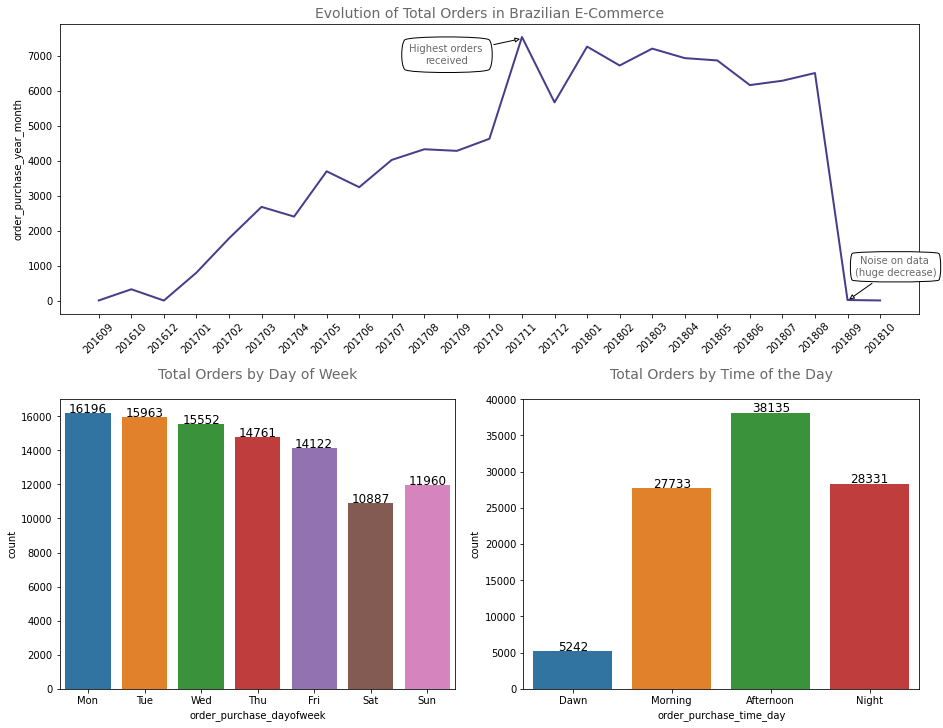

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(13, 10))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Lineplot - Evolution of e-commerce orders along time 
sns.lineplot(data=df_orders['order_purchase_year_month'].value_counts().sort_index(), ax=ax1, 
             color='darkslateblue', linewidth=2)
ax1.annotate(f'Highest orders \nreceived', (13, 7500), xytext=(-75, -25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
ax1.annotate(f'Noise on data \n(huge decrease)', (23, 0), xytext=(48, 25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
#format_spines(ax1, right_border=False)  
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title('Evolution of Total Orders in Brazilian E-Commerce', size=14, color='dimgrey')

# Barchart - Total of orders by day of week
sns.countplot(x='order_purchase_dayofweek', data = df_orders, ax=ax2)
for p in ax2.patches:
  weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
  ax2.set_xticklabels(weekday_label)
  ax2.set_title('Total Orders by Day of Week', size=14, color='dimgrey', pad=20)
  height = p.get_height()
  ax2.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)

# Barchart - Total of orders by time of the day
sns.countplot(x='order_purchase_time_day', data = df_orders,  ax=ax3)
for p in ax3.patches:
  day_lebel = ['Dawn', 'Morning', 'Afternoon', 'Night']
  ax3.set_xticklabels(day_lebel)
  ax3.set_title('Total Orders by Time of the Day', size=14, color='dimgrey', pad=20)
  height = p.get_height()
  ax3.text(p.get_x() + p.get_width() / 2., height + 100, height, ha = 'center', size = 12)
plt.show()


위의 도표를 통해 다음과 같은 결론을 내릴 수 있습니다.
​
* 브라질에서의 전자상거래는 시간이 지남에 따라 정말로 증가하는 추세를 가지고 있다. 특정 월에 피크가 나타나는 계절성을 볼 수 있지만 일반적으로 고객이 이전보다 온라인으로 물건을 구매하는 경향이 더 높다는 것을 알 수 있습니다.
* 월요일은 브라질 고객들이 선호하는 날이고 그들은 오후에 더 많이 사는 경향이 있다.  

2018년 8월부터 2018년 9월 사이에 급격히 감소했으며, 데이터의 노이즈와 관련이 있을 것입니다. 2017년과 2018년의 추가 비교를 위해, 두 해 모두 1월과 8월 사이의 주문만 고려해보자

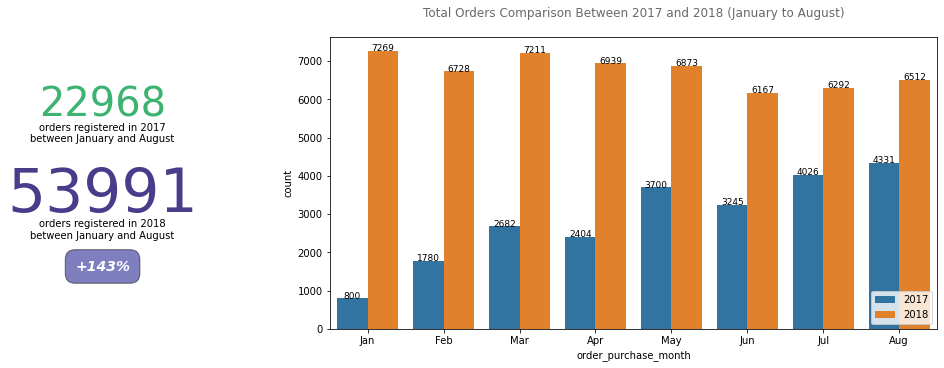

In [ ]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(13, 5))

# Axis definition
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])

# Annotation - Grown on e-commerce orders between 2017 and 2018
df_orders_compare = df_orders.query('order_purchase_year in (2017, 2018) & order_purchase_month <= 8')
year_orders = df_orders_compare['order_purchase_year'].value_counts()
growth = int(round(100 * (1 + year_orders[2017] / year_orders[2018]), 0))
ax1.text(0.00, 0.73, f'{year_orders[2017]}', fontsize=40, color='mediumseagreen', ha='center')
ax1.text(0.00, 0.64, 'orders registered in 2017\nbetween January and August', fontsize=10, ha='center')
ax1.text(0.00, 0.40, f'{year_orders[2018]}', fontsize=60, color='darkslateblue', ha='center')
ax1.text(0.00, 0.31, 'orders registered in 2018\nbetween January and August', fontsize=10, ha='center')
signal = '+' if growth > 0 else '-'
ax1.text(0.00, 0.20, f'{signal}{growth}%', fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax1.axis('off')

# Bar chart - Comparison between monthly sales between 2017 and 2018
sns.countplot(x='order_purchase_month', hue='order_purchase_year', data = df_orders_compare,  ax=ax2)
for p in ax2.patches:
  month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
  ax2.set_xticklabels(month_label)
  ax2.set_title('Total Orders Comparison Between 2017 and 2018 (January to August)', size=12, color='dimgrey', pad=20)
  height = p.get_height()
  ax2.text(p.get_x() + p.get_width()/2., height+3, height, ha = 'center', size=9)
plt.legend(loc='lower right')
plt.show()

### 브라질 주 전자상거래에 대한 예측을 위한 데이터를 준비 단계
  1. 주문 데이터를 Order_items 데이터로 병합합니다.
  2. API(브라질 정부)를 사용하여 각 customer_state의 지역을 반환합니다.
  3. 비즈니스 질문에 답변하는 데 유용한 차트 작성

In [ ]:
# Merging orders and order_items
order_items_data = df_orders.merge(order_items_data, how='left', on='order_id')

# API 를 가져옴.
r = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/mesorregioes')
content = [c['UF'] for c in json.loads(r.text)]
br_info = pd.DataFrame(content)
br_info['nome_regiao'] = br_info['regiao'].apply(lambda x: x['nome'])
br_info.drop('regiao', axis=1, inplace=True)
br_info.drop_duplicates(inplace=True)

# 브라질 내부만 다루기 위해서 범위 나누기

#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo_prep = geolocation_data[geolocation_data.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo_prep = geo_prep[geo_prep.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo_prep = geo_prep[geo_prep.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo_prep = geo_prep[geo_prep.geolocation_lng <=  -34.79314722]
geo_group = geo_prep.groupby(by='geolocation_zip_code_prefix', as_index=False).min()

# Merging all the informations
order_items_data = order_items_data.merge(br_info, how='left', left_on='customer_state', right_on='sigla')
order_items_data = order_items_data.merge(geo_group, how='left', left_on='customer_zip_code_prefix', 
                                        right_on='geolocation_zip_code_prefix')
order_items_data.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2018-08-13  af07308b275d755c9edb36a90c618231   
2                    2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   
3                    2017-12-15  7c142cf63193a1473d2e66489a9ae977   
4                    2018-02-26  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix            customer_city customer_state  \
0                      3149                sao paulo             SP   
1                     47813                barreiras             BA   
2                     75265               vianopolis             GO   
3                     59296  sao goncalo do amarante             RN   
4                      9195              santo andre             SP   

   order_purchase_year  order_purchase_month order_purchase_month_name  \
0                 2017                    10                       Oct   
1                 2018                     7                       Jul   
2                 2018                     8                       Aug   
3                 2017                    11                       Nov   
4                 2018                     2                       Feb   

  order_purchase_year_month order_purchase_date  order_purchase_day  \
0                    201710            20171002                   2   
1                    201807            20180724                  24   
2                    201808            20180808                   8   
3                    201711            20171118                  18   
4                    201802            20180213                  13   

   order_purchase_dayofweek order_purchase_dayofweek_name  \
0                         0                           Mon   
1                         1                           Tue   
2                         2                           Wed   
3                         5                           Sat   
4                         1                           Tue   

   order_purchase_hour order_purchase_time_day  order_item_id  \
0                   10                 Morning            1.0   
1                   20                   Night            1.0   
2                    8                 Morning            1.0   
3                   19                   Night            1.0   
4                   21                   Night            1.0   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3  d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b

- 지역별, 주별, 도시별 고객 주문 

In [ ]:
# Filtering data between 201701 and 201808
df_orders_filt = order_items_data[(order_items_data['order_purchase_year_month'].astype(int) >= 201701)]
df_orders_filt = df_orders_filt[(df_orders_filt['order_purchase_year_month'].astype(int) <= 201808)]

# Grouping data by region
df_regions_group = df_orders_filt.groupby(by=['order_purchase_year_month', 'nome_regiao'], as_index=False)
df_regions_group = df_regions_group.agg({'customer_id': 'count', 'price': 'sum'}).sort_values(by='order_purchase_year_month')
df_regions_group.columns = ['month', 'region', 'order_count', 'order_amount']
df_regions_group.reset_index(drop=True, inplace=True)

# Grouping data by city (top 10)
df_cities_group = df_orders_filt.groupby(by='geolocation_city', 
                                       as_index=False).count().loc[:, ['geolocation_city', 'order_id']]
df_cities_group = df_cities_group.sort_values(by='order_id', ascending=False).reset_index(drop=True)
df_cities_group = df_cities_group.iloc[:10, :]

In [ ]:
df_orders_filt

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
113420  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
113421  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
113422  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113423  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113424  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp   order_approved_at  \
0         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1         delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2         delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3         delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4         delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
...             ...                      ...                 ...   
113420    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
113421    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
113422    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
113423    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
113424    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2018-07-26 14:31:00           2018-08-07 15:27:45   
2               2018-08-08 13:50:00           2018-08-17 18:06:29   
3               2017-11-22 13:39:59           2017-12-02 00:28:42   
4               2018-02-14 19:46:34           2018-02-16 18:17:02   
...                             ...                           ...   
113420          2018-02-07 23:22:42           2018-02-28 17:37:56   
113421          2017-08-28 20:52:26           2017-09-21 11:24:17   
113422          2018-01-12 15:35:03           2018-01-25 23:32:54   
113423          2018-01-12 15:35:03           2018-01-25 23:32:54   
113424          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date                customer_unique_id  \
0                         2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                         2018-08-13  af07308b275d755c9edb36a90c618231   
2                         2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   
3                         2017-12-15  7c142cf63193a1473d2e66489a9ae977   
4                         2018-02-26  72632f0f9dd73dfee390c9b22eb56dd6   
...                              ...                               ...   
113420                    2018-03-02  da62f9e57a76d978d02ab5362c509660   
113421                    2017-09-27  737520a9aad80b3fbbdad19b66b37b30   
113422                    2018-02-15  5097a5312c8b157bb7be58ae360ef43c   
113423                    2018-02-15  5097a5312c8b157bb7be58ae360ef43c   
113424                    2018-04-03  60350aa974b26ff12caad89e55993bd6   

        customer_zip_code_prefix            customer_city customer_state  \
0                           3149                sao paulo             SP   
1                          47813                barreiras             BA   
2                          75265               vianopolis             GO   
3                          59296  sao goncalo do amarante             RN   
4                           9195              santo andre             SP   
...                          ...                      ...            ...   
113420                     1

In [ ]:
%matplotlib inline

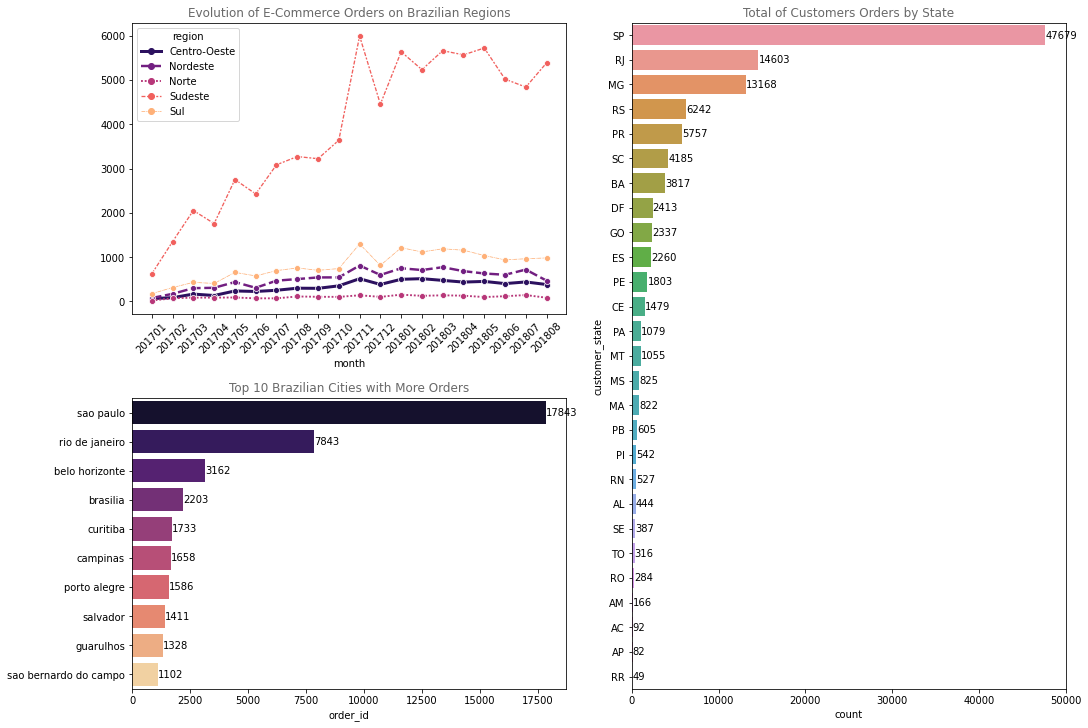

In [ ]:
# Creating and preparing figure and axis
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

# Count of orders by region
sns.lineplot(x='month', y='order_count', ax=ax1, data=df_regions_group, hue='region', 
             size='region', style='region', palette='magma', markers=['o'] * 5)
#format_spines(ax1, right_border=False)
ax1.set_title('Evolution of E-Commerce Orders on Brazilian Regions', size=12, color='dimgrey')
ax1.set_ylabel('')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

# Top cities with more customers orders in Brazil
sns.barplot(y='geolocation_city', x='order_id', data=df_cities_group, ax=ax2, palette='magma')
for p in ax2.patches:
  ax2.set_ylabel('')
  ax2.set_title('Top 10 Brazilian Cities with More Orders', size=12, color='dimgrey')
  x, y, width, height = p.get_bbox().bounds
  ax2.text(width*1, y+height/2, "%.0d"%width, va='center')
#AnnotateBars(n_dec=0, font_size=10, color='black').horizontal(ax2)
#format_spines(ax2, right_border=False)


# Total orders by state
sns.countplot(y='customer_state', data = df_orders_filt,  ax=ax3, order = df_orders_filt['customer_state'].value_counts().index)
for p in ax3.patches:
  #ax3.set_ylabel('')
  ax3.set_title('Total of Customers Orders by State', size=12, color='dimgrey')
  x, y, width, height = p.get_bbox().bounds
  ax3.text(width*1, y+height/2, "%.0d"%width, va='center')


plt.show()

In [ ]:
# 2018년도 30K 만큼의 주문을 기준으로 지도의 분포도를 본다.
# Zipping locations
lats = list(order_items_data.query('order_purchase_year == 2018')['geolocation_lat'].dropna().values)[:30000]
longs = list(order_items_data.query('order_purchase_year == 2018')['geolocation_lng'].dropna().values)[:30000]
locations = list(zip(lats, longs))

# Creating a mapa using folium
map1 = folium.Map(location=[-15, -50], zoom_start=4.0)

# Plugin: FastMarkerCluster
FastMarkerCluster(data=locations).add_to(map1)

map1

브라질 남동부가 전자상거래를 통해 가장 많은 주문을 받고 있다는 것을 이미 알 수 있습니다.

In [ ]:
# Grouping geolocation data for plotting a heatmap
heat_data = df_orders_filt.groupby(by=['geolocation_lat', 'geolocation_lng'], as_index=False).count().iloc[:, :3]

# Creating a mapa using folium
map1 = folium.Map(
    location=[-15, -50], 
    zoom_start=4.0, 
    tiles='cartodbdark_matter'
)

# Plugin: HeatMap
HeatMap(
    name='Mapa de Calor',
    data=heat_data,
    radius=10,
    max_zoom=13
).add_to(map1)

map1

2018년 1월부터 7월까지 주문량을 봄.

In [ ]:
epoch_list = []
heatmap_evl_data = order_items_data[(order_items_data['order_purchase_year_month'].astype(int) >= 201801)]
heatmap_evl_data = heatmap_evl_data[(heatmap_evl_data['order_purchase_year_month'].astype(int) <= 201807)]
time_index = heatmap_evl_data['order_purchase_year_month'].sort_values().unique()
for epoch in time_index:
    data_temp = heatmap_evl_data.query('order_purchase_year_month == @epoch')
    data_temp = data_temp.groupby(by=['geolocation_lat', 'geolocation_lng'], as_index=False).count()
    data_temp = data_temp.sort_values(by='order_id', ascending=False).iloc[:, :3]
    epoch_list.append(data_temp.values.tolist())
    
# Creating a mapa using folium
map2 = folium.Map(
    location=[-15, -50], 
    zoom_start=4.0, 
    tiles='cartodbdark_matter'
)

# Plugin: HeatMapWithTime
HeatMapWithTime(
    name='Evolution of Orders in a Geolocation Perspective',
    data=epoch_list,
    radius=10,
    index=list(time_index)
).add_to(map2)

map2

주문 가격, 운임 등을 살펴 전자 상거래가 움직이는 돈을 분석해보겠습니다.


1. 전자상거래 판매는 어떻습니까? 
2. 그들은 시간이 지남에 따라 성장했나요?   
이 질문에 답하기 위해, 먼저 진화를 전반적으로 볼 수 있는 방식으로 데이터를 그룹화합니다.

In [ ]:
# Grouping data
# 매달 구입가격, 운임비, 주문당 가격, 주문당 운임비
df_month_aggreg = df_orders_filt.groupby(by=['order_purchase_year', 'order_purchase_year_month'], as_index=False)
df_month_aggreg = df_month_aggreg.agg({
    'order_id': 'count',
    'price': 'sum',
    'freight_value': 'sum'
})

# Adding new columns for analysis
df_month_aggreg['price_per_order'] = df_month_aggreg['price'] / df_month_aggreg['order_id']
df_month_aggreg['freight_per_order'] = df_month_aggreg['freight_value'] / df_month_aggreg['order_id']
df_month_aggreg.head()

order_purchase_year order_purchase_year_month  order_id      price  \
0                 2017                    201701       966  120312.87   
1                 2017                    201702      1998  247303.02   
2                 2017                    201703      3041  374344.30   
3                 2017                    201704      2697  359927.23   
4                 2017                    201705      4176  506071.14   

   freight_value  price_per_order  freight_per_order  
0       16875.62       124.547484          17.469586  
1       38977.60       123.775285          19.508308  
2       57704.29       123.099079          18.975432  
3       52495.01       133.454664          19.464223  
4       80119.81       121.185618          19.185778

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning:

This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 



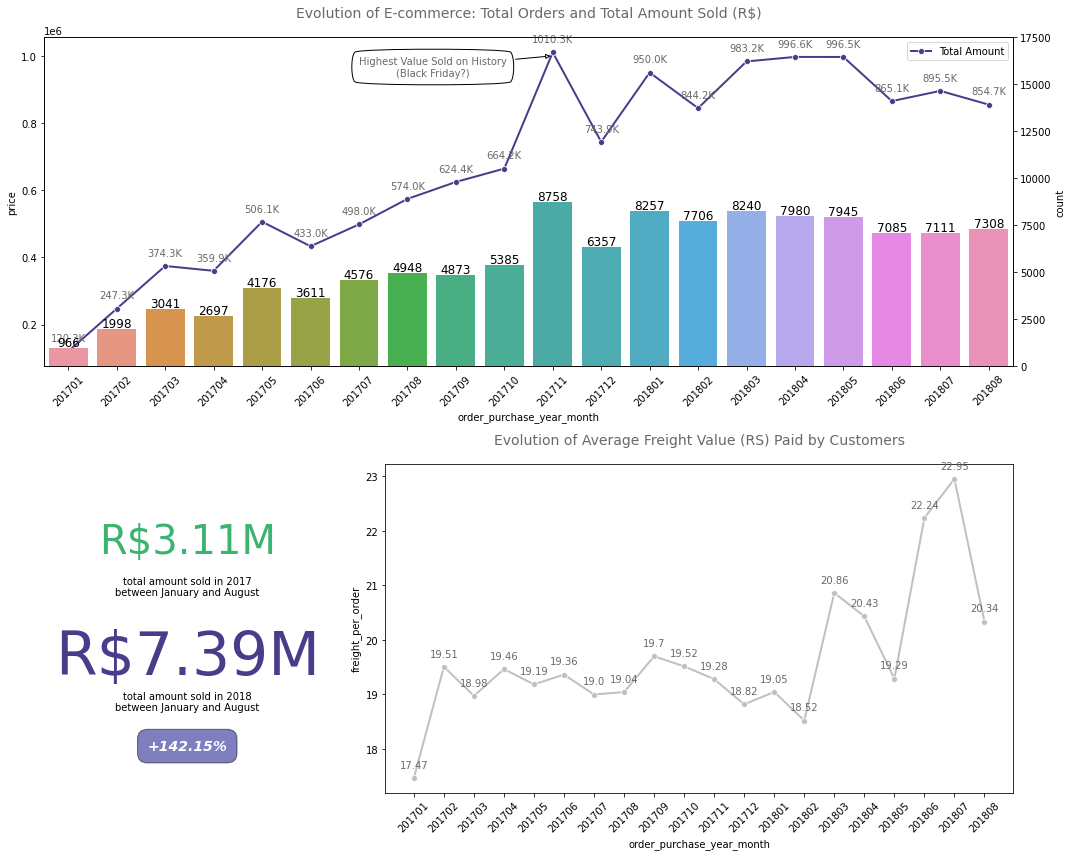

In [ ]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

# Axis definition
gs = GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1:])

# Plot 1 - Evolution of total orders and total sales on e-commerce
sns.lineplot(x='order_purchase_year_month', y='price', ax=ax1, data=df_month_aggreg, linewidth=2, 
             color='darkslateblue', marker='o', label='Total Amount')
ax1_twx = ax1.twinx()
month_names = ['201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708','201709', '201710','201711', '201712',
                    '201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808']
sns.countplot(x='order_purchase_year_month', data = df_orders_filt, order = month_names,ax=ax1_twx)

ax1_twx.set_yticks(np.arange(0, 20000, 2500))
for p in ax1_twx.patches:
  height = p.get_height()
  ax1_twx.text(p.get_x() + p.get_width() / 2., height + 100, height, ha = 'center', size = 12)
# Customizing the first plot
#format_spines(ax1)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
for x, y in df_month_aggreg.price.items():
    ax1.annotate(str(round(y/1000, 1))+'K', xy=(x, y), textcoords='offset points', xytext=(0, 10),
                ha='center', color='dimgrey')
ax1.annotate(f'Highest Value Sold on History\n(Black Friday?)', (10, 1000000), xytext=(-120, -20), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
ax1.set_title('Evolution of E-commerce: Total Orders and Total Amount Sold (R$)', size=14, color='dimgrey', pad=20)

# Plot 2 - Big Numbers of Sales Evolution
month_comparison = ['201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708',
                    '201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808']
df_sales_compare = df_month_aggreg.query('order_purchase_year_month in (@month_comparison)')
sold_2017 = df_sales_compare.query('order_purchase_year == 2017')['price'].sum()
sold_2018 = df_sales_compare.query('order_purchase_year == 2018')['price'].sum()
growth = 1 + (sold_2017 / sold_2018)
ax2.text(0.50, 0.73, 'R$' + str(round(sold_2017/1000000, 2)) + 'M', fontsize=40, color='mediumseagreen', ha='center')
ax2.text(0.50, 0.60, 'total amount sold in 2017\nbetween January and August', fontsize=10, ha='center')
ax2.text(0.50, 0.36, 'R$' + str(round(sold_2018/1000000, 2)) + 'M', fontsize=60, color='darkslateblue', ha='center')
ax2.text(0.50, 0.25, 'total amount sold in 2018\nbetween January and August', fontsize=10, ha='center')
signal = '+' if growth > 0 else '-'
ax2.text(0.50, 0.13, f'{signal}{str(round(100 * growth, 2))}%', fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax2.axis('off')

# Plot 3 - Evolution of mean freight value paid by the customers
sns.lineplot(x='order_purchase_year_month', y='freight_per_order', data=df_month_aggreg, linewidth=2, 
             color='silver', marker='o', ax=ax3)
#format_spines(ax3, right_border=False)
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)
for x, y in df_month_aggreg.freight_per_order.items():
    ax3.annotate(round(y, 2), xy=(x, y), textcoords='offset points', xytext=(0, 10),
                ha='center', color='dimgrey')
ax3.set_title('Evolution of Average Freight Value (RS) Paid by Customers', size=14, color='dimgrey', pad=20)

plt.tight_layout()
plt.show()

브라질 주에서 총 판매량(가격 합계)은 어떻게 집중됩니까?

In [ ]:
df_by_group = df_orders_filt.groupby(['customer_state'])['price'].mean().sort_values(ascending = False)
df_by_group

customer_state
PB    191.710782
AL    181.521086
AC    173.727717
RO    165.973525
PA    165.605410
AP    164.320732
PI    160.266322
TO    157.529333
RR    157.486531
RN    157.073073
SE    153.495812
CE    153.341489
MT    148.408498
MA    145.943509
PE    145.313469
MS    142.628376
AM    135.496000
BA    134.507494
GO    126.282822
DF    125.754867
RJ    124.817283
SC    124.502710
ES    121.722700
MG    120.823853
RS    120.174328
PR    119.276401
SP    109.633981
Name: price, dtype: float64

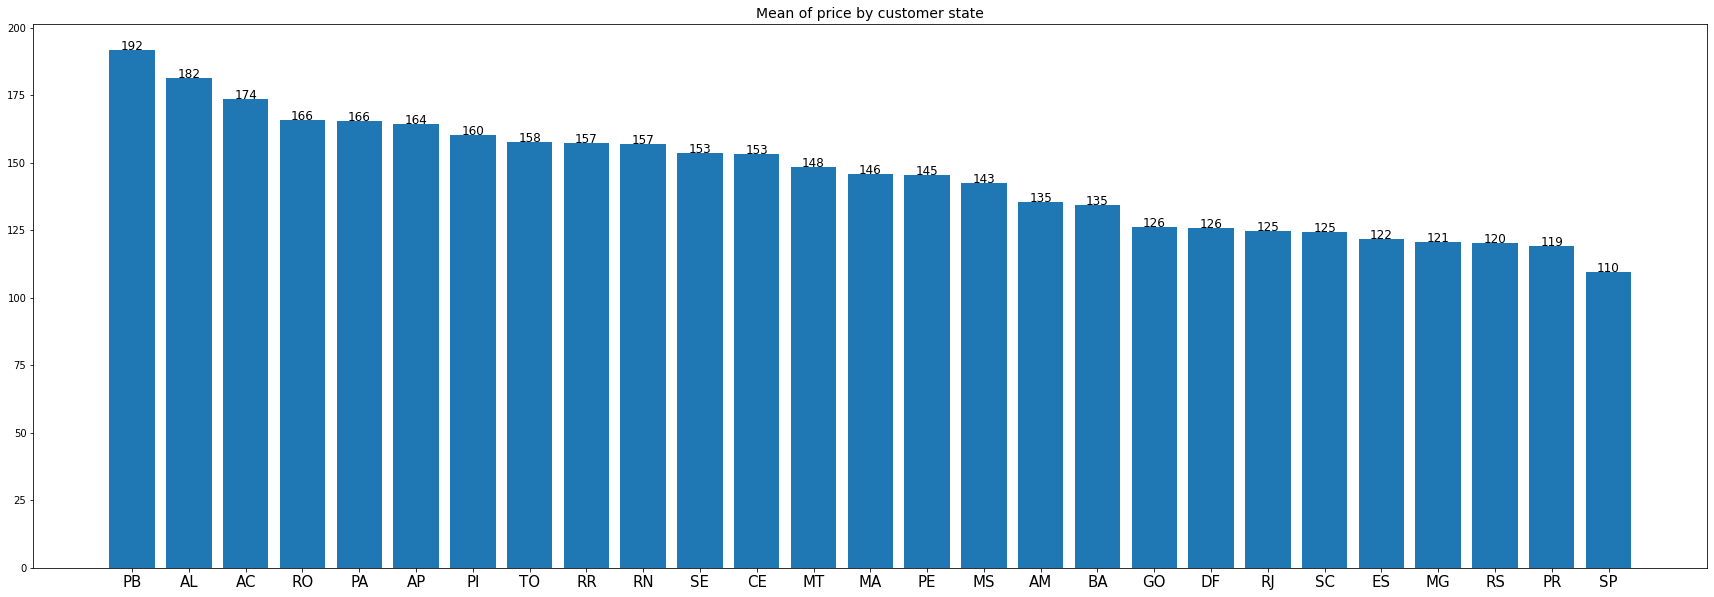

In [ ]:
plt.figure(figsize=(30, 10))
label = df_by_group.index
index = np.arange(len(label)) # 각 state
bar=plt.bar(index, df_by_group)
plt.title('Mean of price by customer state', size=14) # 각 주 별로 소비의 평균 가격
plt.xticks(index, label, fontsize=15) # label 이름 넣기

for p in bar:
  height = p.get_height()
  plt.text(p.get_x() + p.get_width() / 2., height,'%.0f' % height, ha = 'center', size = 12)
plt.show()

In [ ]:
df_by_group = df_orders_filt.groupby(['customer_state'])['price'].sum().sort_values(ascending = False)
df_by_group

customer_state
SP    5188099.23
RJ    1812846.22
MG    1580496.82
RS     746162.40
PR     681068.25
SC     518180.28
BA     510455.94
DF     301560.17
GO     293607.56
ES     274119.52
PE     261418.93
CE     225565.33
PA     177860.21
MT     156125.74
MA     118943.96
MS     116812.64
PB     115218.18
PI      86704.08
RN      82306.29
AL      80232.32
SE      58635.40
TO      49621.74
RO      46140.64
AM      22356.84
AC      15982.95
AP      13474.30
RR       7716.84
Name: price, dtype: float64

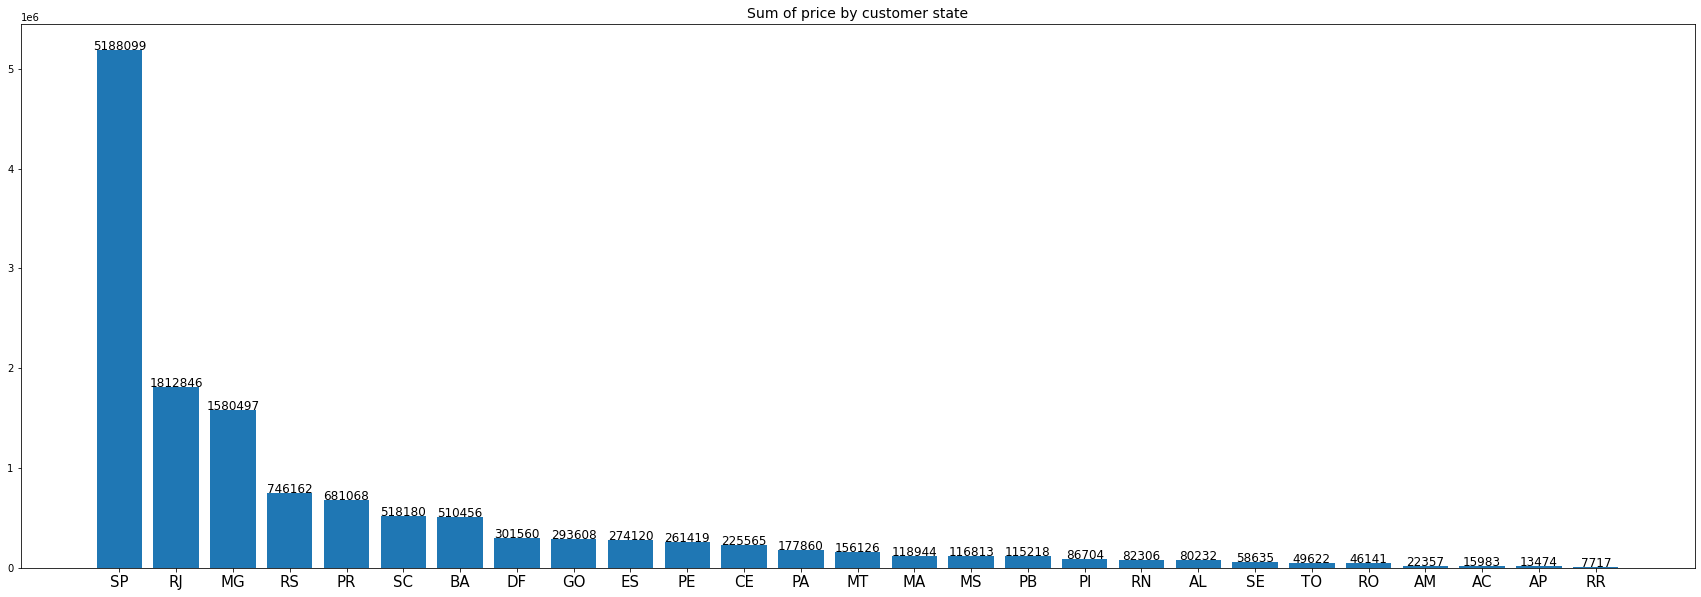

In [ ]:
plt.figure(figsize=(30, 10))
label = df_by_group.index
index = np.arange(len(label)) # 각 state
bar = plt.bar(index, df_by_group)


plt.title('Sum of price by customer state', size=14) # 각 주 별로 소비 가격의 총합
plt.xticks(index, label, fontsize=15) # label 이름 넣기
for p in bar:
  height = p.get_height()
  plt.text(p.get_x() + p.get_width() / 2., height,'%.0f' % height, ha = 'center', size = 12)
plt.show()

몇몇 주들이 어떻게 총 판매금액이 높고 주문당 소비 가격이 낮다.  
예를 들어 SP(상파울루)를 살펴보면 전자상거래에 가장 판매한 가격이 높은 (5,188,099가격)이지만 고객이 주문당 가격을 적게 지불하는 주(주문당 110)임을 알 수 있습니다.

## 운임은 알아보기

In [ ]:
df_by_group = df_orders_filt.groupby(['customer_state'])['freight_value'].mean().sort_values(ascending = False)
df_by_group

customer_state
RR    43.725102
PB    42.753561
RO    41.069712
AC    40.073370
PI    39.153623
MA    38.318012
TO    37.246603
SE    36.782723
AL    35.898597
PA    35.850847
RN    35.701240
AP    34.006098
AM    33.205394
PE    32.868410
CE    32.692855
MT    28.080409
BA    26.365057
MS    23.374884
GO    22.771914
ES    22.031639
RS    21.734803
SC    21.475034
DF    21.046355
RJ    20.964484
MG    20.643997
PR    20.555599
SP    15.146922
Name: freight_value, dtype: float64

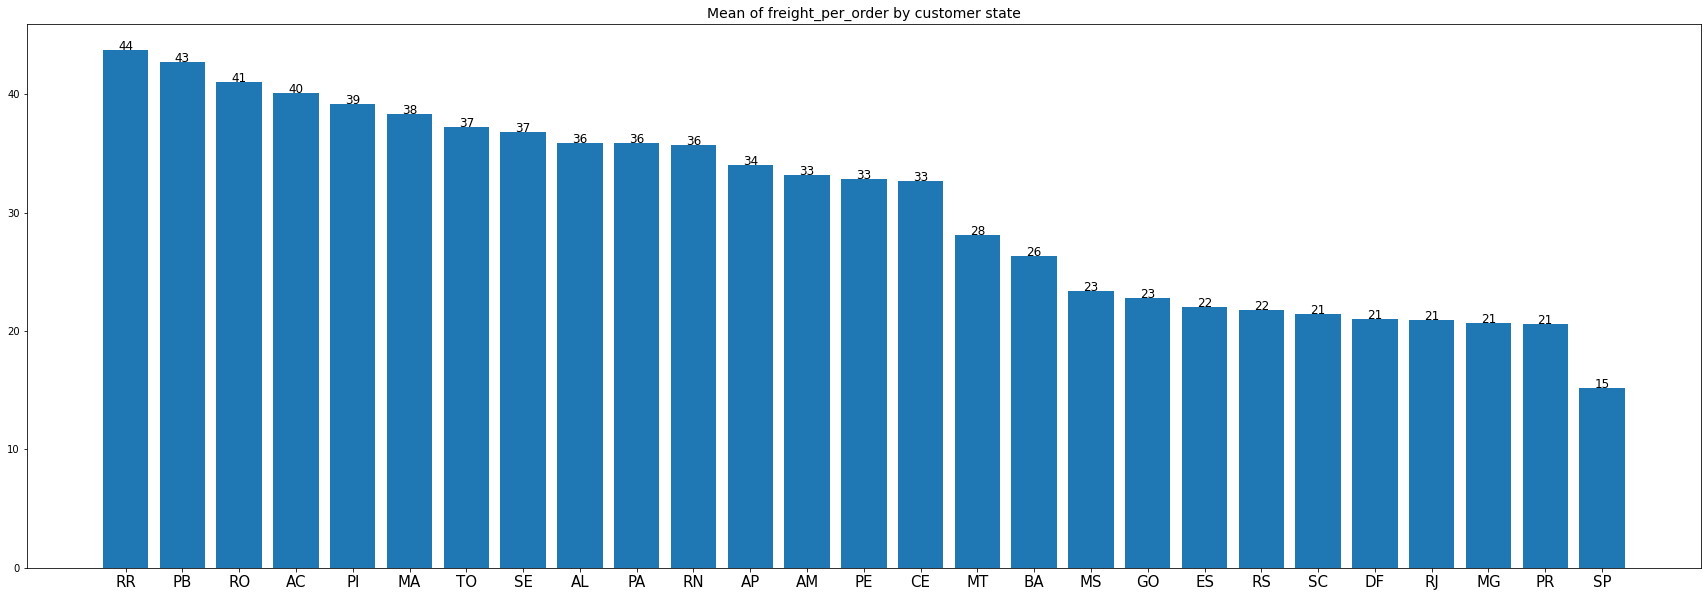

In [ ]:
plt.figure(figsize=(30, 10))
label = df_by_group.index
index = np.arange(len(label)) # 각 state
bar=plt.bar(index, df_by_group)
plt.title('Mean of freight_per_order by customer state', size=14) # 각 주 별로 소비의 배송비 평균
plt.xticks(index, label, fontsize=15) # label 이름 넣기

for p in bar:
  height = p.get_height()
  plt.text(p.get_x() + p.get_width() / 2., height,'%.0f' % height, ha = 'center', size = 12)
plt.show()

In [ ]:
df_by_group = df_orders_filt.groupby(['customer_state'])['freight_value'].sum().sort_values(ascending = False)
df_by_group

customer_state
SP    716782.63
RJ    304488.16
MG    270044.12
RS    134951.39
PR    117372.47
BA    100055.39
SC     89379.09
PE     59130.27
GO     52944.70
DF     50469.16
ES     49615.25
CE     48091.19
PA     38503.81
MA     31229.18
MT     29540.59
PB     25694.89
PI     21182.11
MS     19144.03
RN     18707.45
AL     15867.18
SE     14051.00
TO     11732.68
RO     11417.38
AM      5478.89
AC      3686.75
AP      2788.50
RR      2142.53
Name: freight_value, dtype: float64

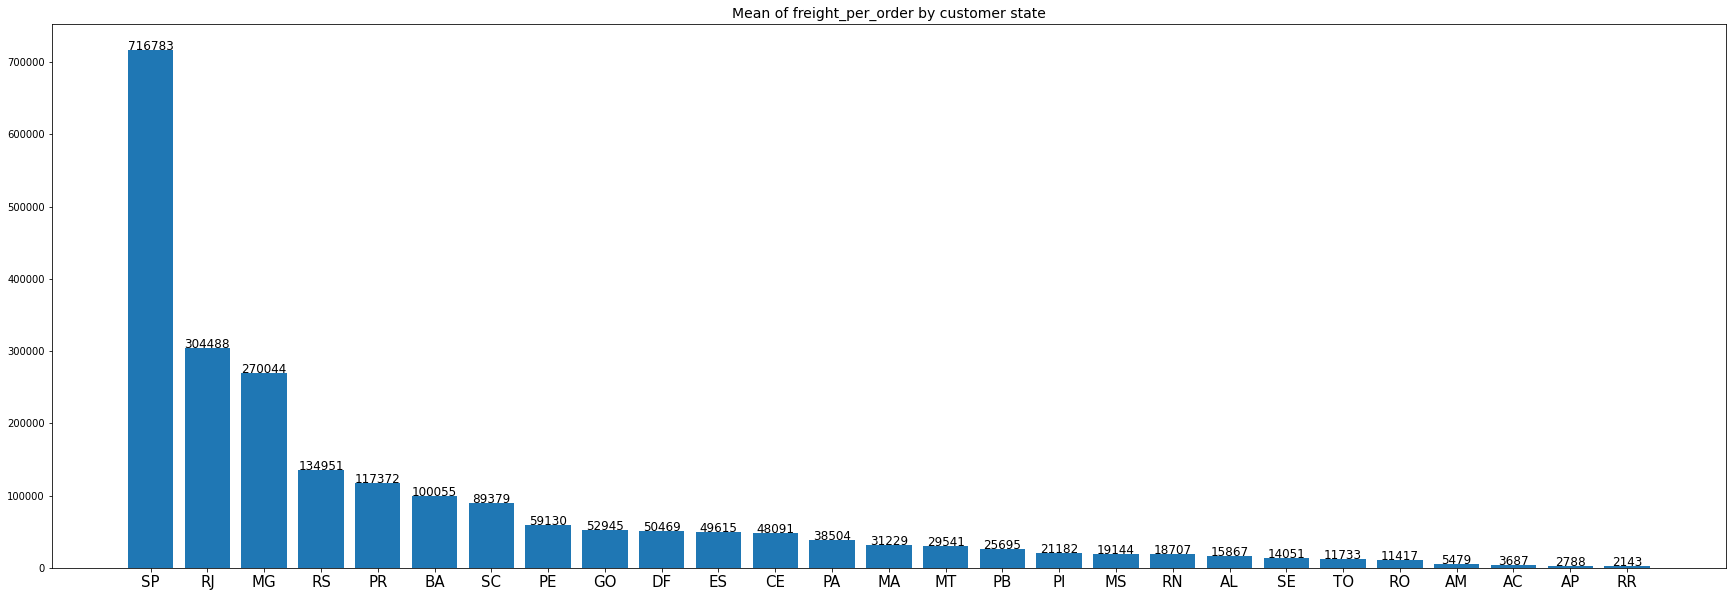

In [ ]:
plt.figure(figsize=(30, 10))
label = df_by_group.index
index = np.arange(len(label)) # 각 state
bar=plt.bar(index, df_by_group)
plt.title('Sum of freight_per_order by customer state', size=14) # 각 주 별로 소비의 배송비 총합
plt.xticks(index, label, fontsize=15) # label 이름 넣기

for p in bar:
  height = p.get_height()
  plt.text(p.get_x() + p.get_width() / 2., height,'%.0f' % height, ha = 'center', size = 12)
plt.show()

여기서 우리는 평균 운임이 가장 높은 고객 상태에 대한 통찰력을 얻을 수 있다.  
예를 들어, Roraima(RR), Paraíba(PB), Rondonia(RO) 및 Acer(AC)의 고객은 일반적으로 운임에 대해 누구보다 많은 비용을 지불합니다.

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from os.path import join
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn')
sns.set(font_scale=1.5) 

In [3]:
path_prefix = '..\AIFFEL\[DATATHON]Brazil_ecommerce'
customers_df = pd.read_csv(join(path_prefix,'olist_customers_dataset.csv'))
geo_df = pd.read_csv(join(path_prefix,'olist_geolocation_dataset.csv'))
orderitem_df = pd.read_csv(join(path_prefix, 'olist_order_items_dataset.csv'), parse_dates=['shipping_limit_date'])
orderpay_df = pd.read_csv(join(path_prefix, 'olist_order_payments_dataset.csv'))
orderreviews_df = pd.read_csv(join(path_prefix, 'olist_order_reviews_dataset.csv'), parse_dates=['review_creation_date'])
orders_df = pd.read_csv(join(path_prefix, 'olist_orders_dataset.csv'), parse_dates=['order_purchase_timestamp'])
products_df = pd.read_csv(join(path_prefix, 'olist_products_dataset.csv'))
sellers_df = pd.read_csv(join(path_prefix, 'olist_sellers_dataset.csv'))
categname_df = pd.read_csv(join(path_prefix, 'product_category_name_translation.csv'))

In [4]:
products_df.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [5]:
data = orders_df.merge(customers_df, on="customer_id").merge(orderitem_df, on="order_id").merge(products_df, on="product_id").merge(categname_df, on="product_category_name").merge(orderpay_df, on="order_id").merge(sellers_df, on="seller_id").merge(orderreviews_df, on="order_id")

### 매출 대부분을 발생시킨 소비자의 비율

In [6]:
# 누적 주문량이 가장 많은 소비자들 (in payments)
top_customers = data.groupby("customer_unique_id")["payment_value"].sum().reset_index().sort_values("payment_value", ascending=False)
top_customers.rename(columns={"payment_value":"total_paid"}, inplace=True)

In [7]:
top_customers.head()

customer_unique_id  total_paid
3724   0a0a92112bd4c708ca5fde585afaa872   109312.64
71647  c402f431464c72e27330a67f7b94d4fb    44048.00
23448  4007669dec559734d6f53e029e360987    36489.24
87507  ef8d54b3797ea4db1d63f0ced6a906e9    30186.00
43213  763c8b1c9c68a0229c42c9fc6f662b93    29099.52

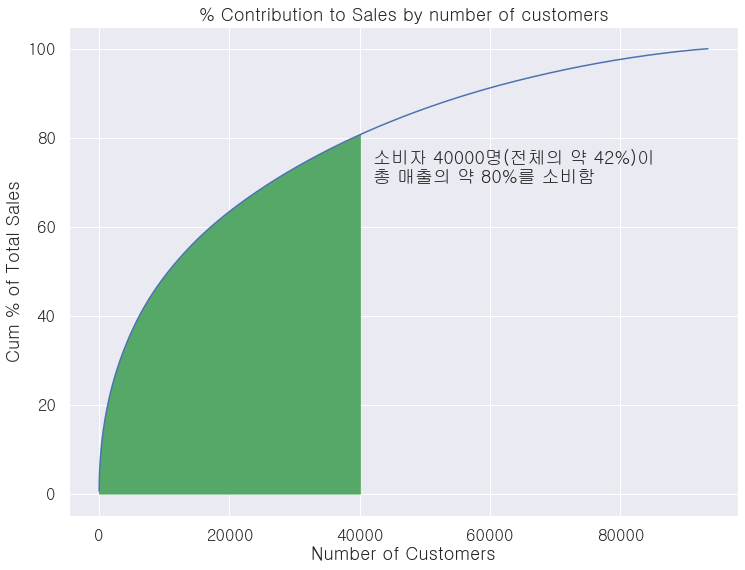

In [8]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.figure(figsize=(12,9))
top_customers["% of Total Sales"] = (top_customers["total_paid"] / top_customers["total_paid"].sum()) * 100
top_customers["Cum % of Total Sales"] = top_customers["% of Total Sales"].cumsum() 
ax = sns.lineplot(x=range(1,len(top_customers)+1), y="Cum % of Total Sales", data=top_customers)
ax.set_xlabel("Number of Customers")
ax.set_title("% Contribution to Sales by number of customers")
a=np.arange(1,len(top_customers)+1)
b=top_customers["Cum % of Total Sales"]
plt.fill_between(a, b, 0,
                 where = (a >= 0) & (a <= 40000),
                 color = 'g')
ax.text(42000, 70, """소비자 40000명(전체의 약 42%)이 
총 매출의 약 80%를 소비함""")
plt.show()

### Top 10 소비자의 소비 경향

### 매출 대부분을 발생시킨 셀러의 비율

In [10]:
top_ordersbyvalue_sellers = data.groupby("seller_id")["payment_value"].sum().reset_index().sort_values("payment_value", ascending=False)
top_ordersbyvalue_sellers["% of Total Payments"] = (top_ordersbyvalue_sellers["payment_value"] / top_ordersbyvalue_sellers["payment_value"].sum()) * 100
top_ordersbyvalue_sellers["Cum % of Total Payments"] = top_ordersbyvalue_sellers["% of Total Payments"].cumsum() 

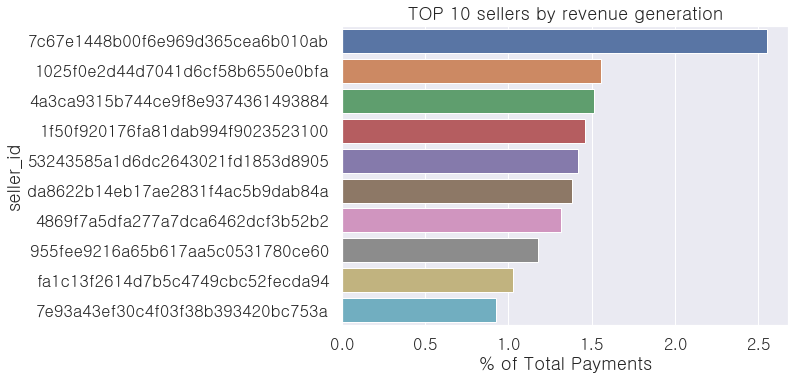

In [11]:
ax = sns.barplot(x="% of Total Payments", y="seller_id", data=top_ordersbyvalue_sellers[:10])
ax.set_title("TOP 10 sellers by revenue generation")
plt.show()

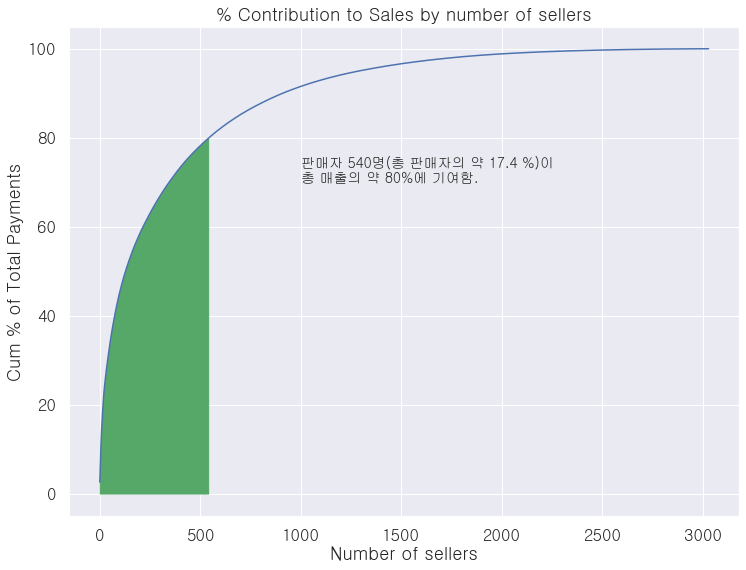

In [12]:
plt.figure(figsize=(12,9))
ax = sns.lineplot(x=range(1,len(top_ordersbyvalue_sellers)+1), y="Cum % of Total Payments", data=top_ordersbyvalue_sellers)
ax.set_xlabel("Number of sellers")
ax.set_title("% Contribution to Sales by number of sellers")
a=np.arange(1,len(top_ordersbyvalue_sellers)+1)
b=top_ordersbyvalue_sellers["Cum % of Total Payments"]
plt.fill_between(a, b, 0,
                 where = (a >= 0) & (a <= 540),
                 color = 'g')
ax.text(1000, 70, """판매자 540명(총 판매자의 약 17.4 %)이 
총 매출의 약 80%에 기여함.""", fontsize=14)
plt.show()

### 상품 평가

최고점을 받은 상품들

In [26]:

plt.figure(figsize=(12,12))
reviewsocres = data.groupby("product_category_name_english")["review_score"].agg(["mean", "count"]).sort_values(by="mean",ascending=False)
bestrated = reviewsocres[reviewsocres["count"]>=30][:10]
bestrated

mean  count
product_category_name_english                         
books_general_interest                 4.438503    561
books_imported                         4.419355     62
flowers                                4.419355     31
costruction_tools_tools                4.415842    101
books_technical                        4.375465    269
food_drink                             4.324138    290
small_appliances_home_oven_and_coffee  4.320513     78
luggage_accessories                    4.295945   1159
fashion_sport                          4.258065     31
food                                   4.228963    511

<Figure size 864x864 with 0 Axes>

최하점을 받은 상품들

In [20]:
worstrated = reviewsocres[reviewsocres["count"]>=30].sort_values(by='mean')[:10]
worstrated

mean  count
product_category_name_english                     
diapers_and_hygiene                3.256410     39
office_furniture                   3.526791   1773
fashion_male_clothing              3.548611    144
fixed_telephony                    3.672862    269
fashio_female_clothing             3.780000     50
furniture_mattress_and_upholstery  3.804878     41
audio                              3.840849    377
furniture_bedroom                  3.841270    126
party_supplies                     3.847826     46
construction_tools_safety          3.848485    198

## RFM

In [51]:
def draw_dist(df_skew, column, kde=False):
    plt.figure(figsize=(10, 6))
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column], kde=kde)
    plt.show()
    return

### Recency

In [33]:
df_recency = data.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
df_recency.rename(columns={'order_purchase_timestamp':'LastPurchaseDate'}, inplace=True)


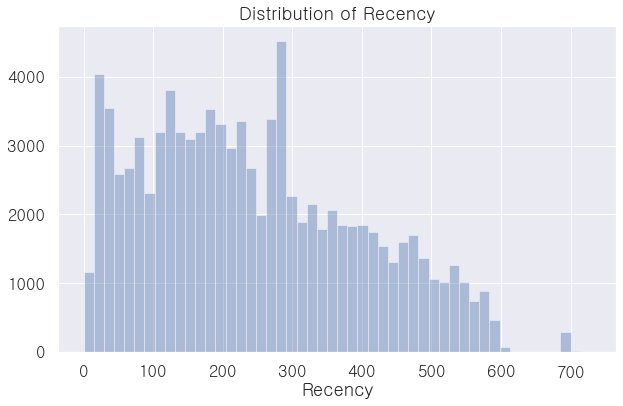

In [46]:
# 최근 주문일자를 이용해서 recency 계산
df_recency = data.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
df_recency.rename(columns={"order_purchase_timestamp":"LastPurchaseDate"}, inplace=True)
df_recency["LastPurchaseDate"] = df_recency["LastPurchaseDate"].dt.date

recent_date = data['order_purchase_timestamp'].dt.date.max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
draw_dist(df_recency, 'Recency')

### Frequency

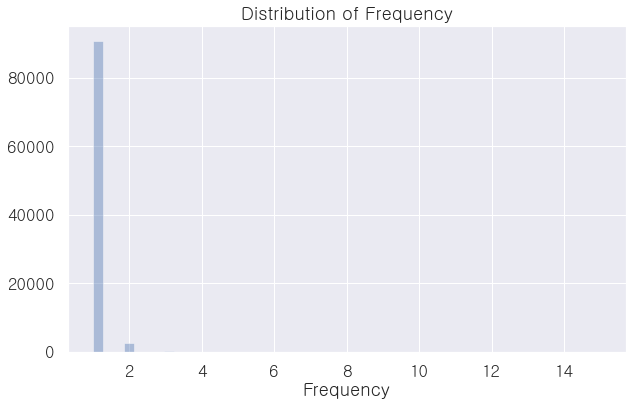

In [143]:
# 구매자당 총 주문 횟수
frequency_df = data.groupby(['customer_unique_id']).agg({'order_id':'nunique'}).reset_index()
frequency_df.rename(columns={'order_id':'Frequency'}, inplace=True)
draw_dist(frequency_df, 'Frequency')

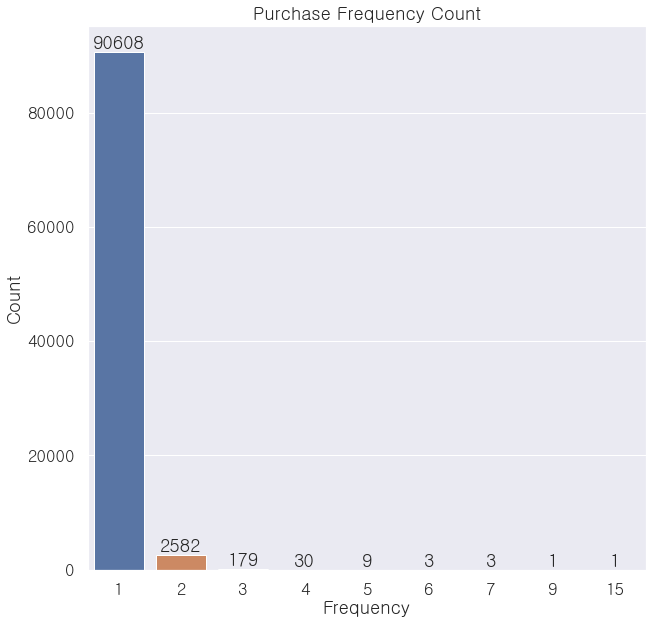

In [37]:
frequency_count = frequency_df.value_counts('Frequency').reset_index()
frequency_count.rename(columns={0:'Count'}, inplace=True)
plt.figure(figsize=(10, 10))
ax = sns.barplot(data=frequency_count, x='Frequency', y='Count')
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Purchase Frequency Count')
plt.show()
# Frequency별 소비액

### Monetary

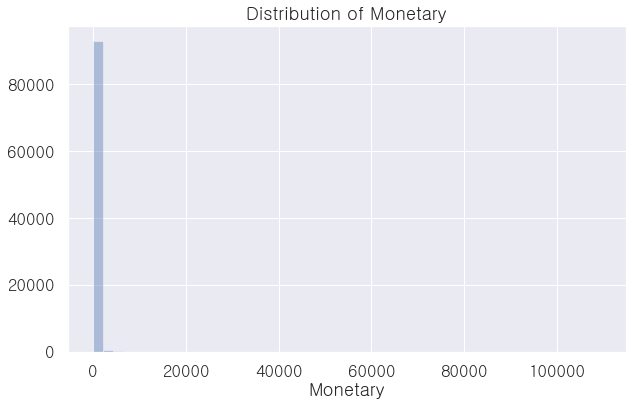

Monetary
count   93416.000000
mean      213.411435
std       631.492386
min         9.590000
25%        64.000000
50%       113.045000
75%       203.405000
max    109312.640000

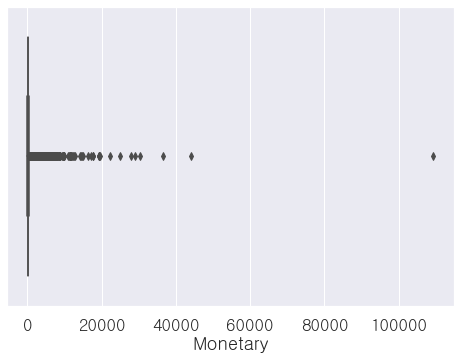

In [71]:
# 구매자당 총 구매금액
monetary_df = data.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary']
monetary_df.head()
draw_dist(monetary_df, 'Monetary')
sns.boxplot(data=monetary_df, x='Monetary')
monetary_df.describe()

In [72]:
# rfm_df로 병합
rf_df = df_recency.merge(frequency_df, on='customer_unique_id')
rfm_df = rf_df.merge(monetary_df, on='customer_unique_id').drop(columns='LastPurchaseDate')
# log 변환 전에 0 -> 1로 바꾸기
rfm_df[rfm_df.columns[1:]] = rfm_df[rfm_df.columns[1:]].applymap(lambda x: 1 if x ==0 else x)


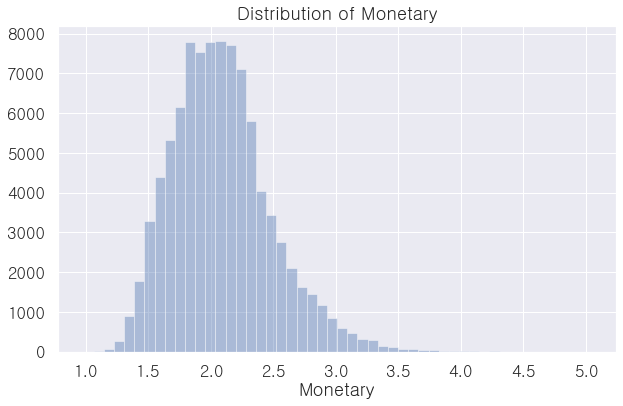

In [58]:
# Perform log transformation
rfm_df_log = rfm_df.copy()
rfm_df_log['Monetary'] = np.log10(rfm_df_log['Monetary'])
draw_dist(rfm_df_log, 'Monetary')

# 2.0에서 구매력이 제일 높다.
# 축을 원래 금액으로 환산
# 금액대를 여기 주변으로 잡아야 된다. 100달러짜리를 많이 판매하는게 좋다.

In [74]:
rfm_df['R_score'] = np.interp(rfm_df_log['Recency'], (rfm_df_log['Recency'].min(), rfm_df_log['Recency'].max()), (100, 1)).round(2)
rfm_df['F_score'] = np.interp(rfm_df_log['Frequency'], (rfm_df_log['Frequency'].min(), rfm_df_log['Frequency'].max()), (1,100))
rfm_df['M_score'] = np.interp(rfm_df_log['Monetary'], (rfm_df_log['Monetary'].min(), rfm_df_log['Monetary'].max()), (1,100))
rfm_df['RFM_score'] = ((rfm_df['R_score'] + rfm_df['F_score'] + rfm_df['M_score'] ) / 3).round(2)
rfm_df_log['R_score'] = rfm_df['R_score'].copy()
rfm_df_log['F_score'] = rfm_df['F_score'].copy()
rfm_df_log['M_score'] = rfm_df['M_score'].copy()
rfm_df_log['RFM_score'] = rfm_df['RFM_score'].copy()

In [76]:
rfm_df['Class'] = pd.qcut(rfm_df['RFM_score'], q=[0, 0.1, 0.3, 0.6, 1], labels=[4,3,2,1])
rfm_df['Class'].head()

0    1
1    2
2    4
3    3
4    2
Name: Class, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]

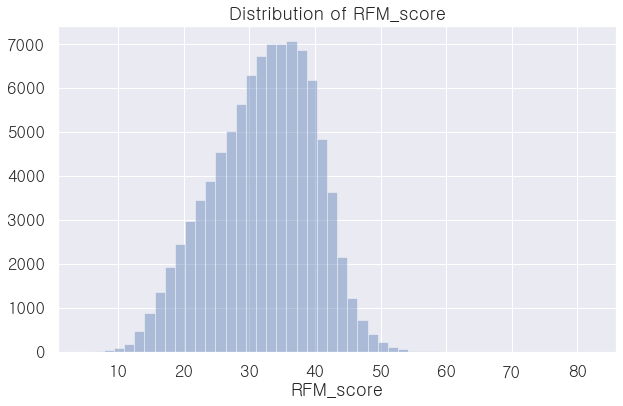

In [64]:
draw_dist(rfm_df, 'RFM_score')

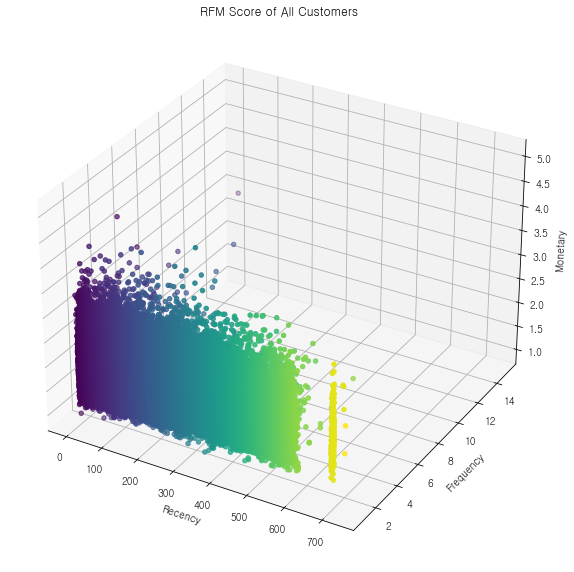

In [51]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')

x = rfm_df_log['Recency']
y = rfm_df_log['Frequency']
z = rfm_df_log['Monetary']

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax = ax.scatter(x,y,z, c=x)

plt.title('RFM Score of All Customers')
plt.show()

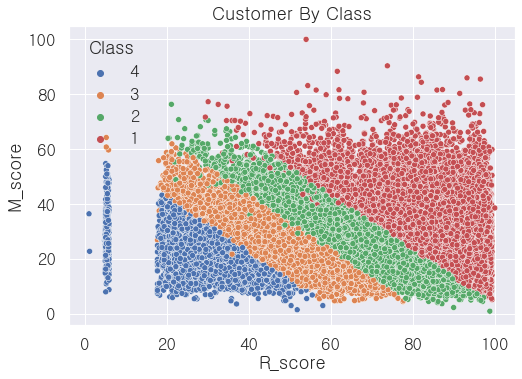

In [77]:
plt.figure
sns.scatterplot(data=rfm_df, x='R_score', y='M_score', hue='Class')
plt.title('Customer By Class')
plt.show()

### 품목별 소비경향

품목과 판매시간을 불러온다.
(products) product_id -> product_category_name
(products) product_id -> (order_items) order_id -> (orders) order_purchase_timestamp

품목을 하나 고른다.
판매시간에서 연월까지만 추출한다.
df_orders['order_purchase_year_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))

In [113]:
products_time_df = pd.merge(products_df[['product_id', 'product_category_name']], categname_df, on='product_category_name')
products_time_df = pd.merge(products_time_df, orderitem_df[['product_id', 'order_id']], on='product_id')
products_time_df = pd.merge(products_time_df, orders_df[['order_id', 'order_purchase_timestamp']], on='order_id')
products_time_df['order_purchase_year_month'] = products_time_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
del products_time_df['product_category_name']
products_time_df.head()

product_id product_category_name_english  \
0  1e9e8ef04dbcff4541ed26657ea517e5                     perfumery   
1  6a2fb4dd53d2cdb88e0432f1284a004c                     perfumery   
2  6a2fb4dd53d2cdb88e0432f1284a004c                     perfumery   
3  0d009643171aee696f4733340bc2fdd0                     perfumery   
4  0d009643171aee696f4733340bc2fdd0                     perfumery   

                           order_id order_purchase_timestamp  \
0  e17e4f88e31525f7deef66779844ddce      2018-04-24 16:16:53   
1  048cc42e03ca8d43c729adf6962cb348      2017-11-16 21:28:00   
2  5fa78e91b5cb84b6a8ccc42733f95742      2017-11-30 01:51:23   
3  24b1c4d88fdb7a2dc87f8ecc7d8f47f1      2017-07-28 09:34:29   
4  7b13c77c64a9a956500cbf1a9a23798d      2018-05-17 09:24:18   

  order_purchase_year_month  
0                    201804  
1                    201711  
2                    201711  
3                    201707  
4                    201805

In [137]:
result = products_time_df.groupby(by='product_category_name_english').count().sort_values(by='product_id', ascending=False)['product_id'][:10]

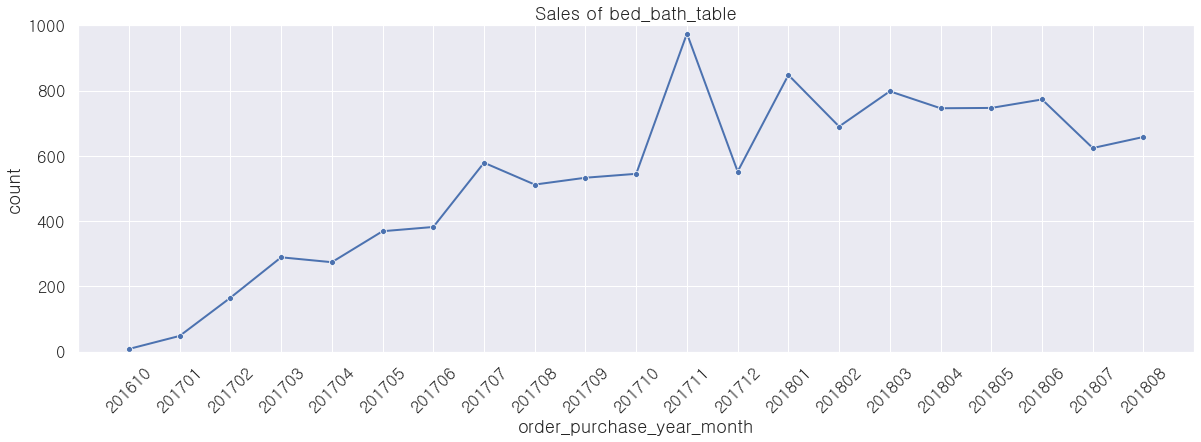

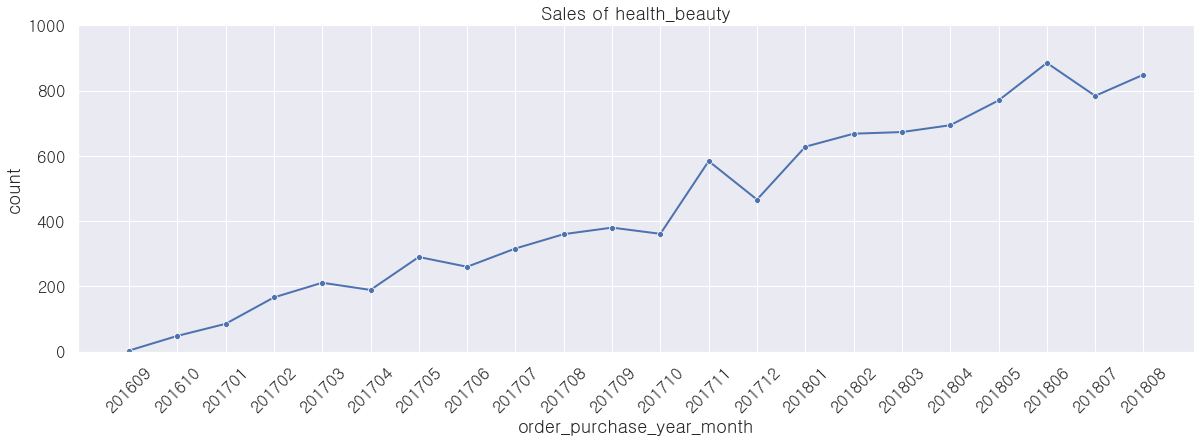

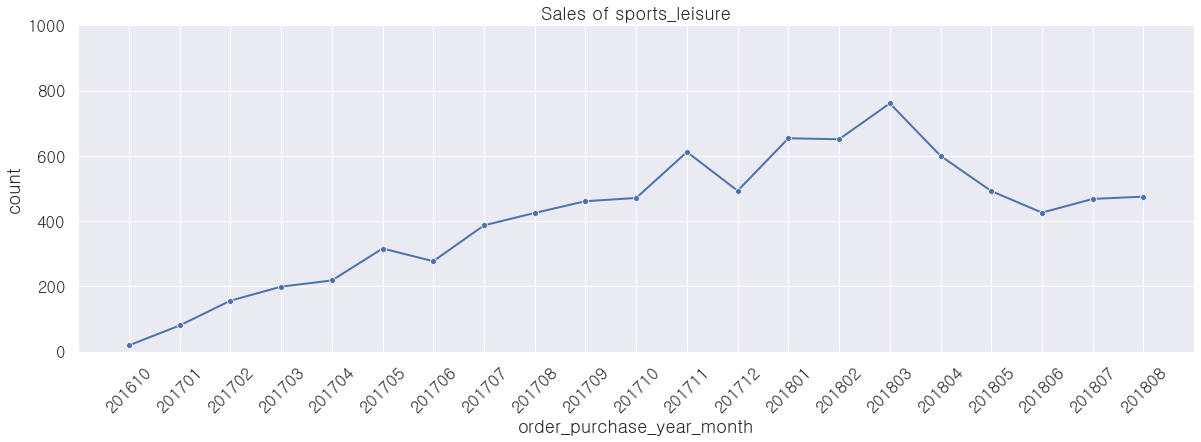

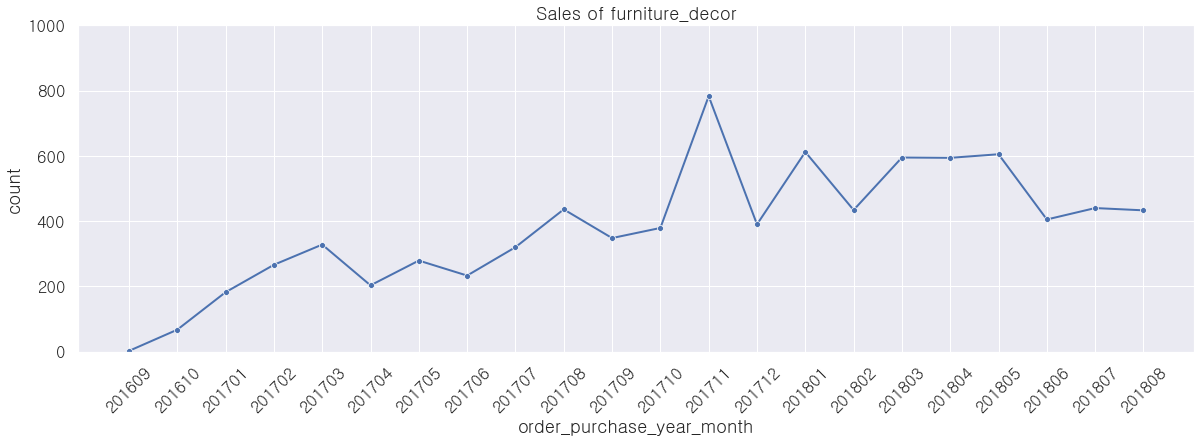

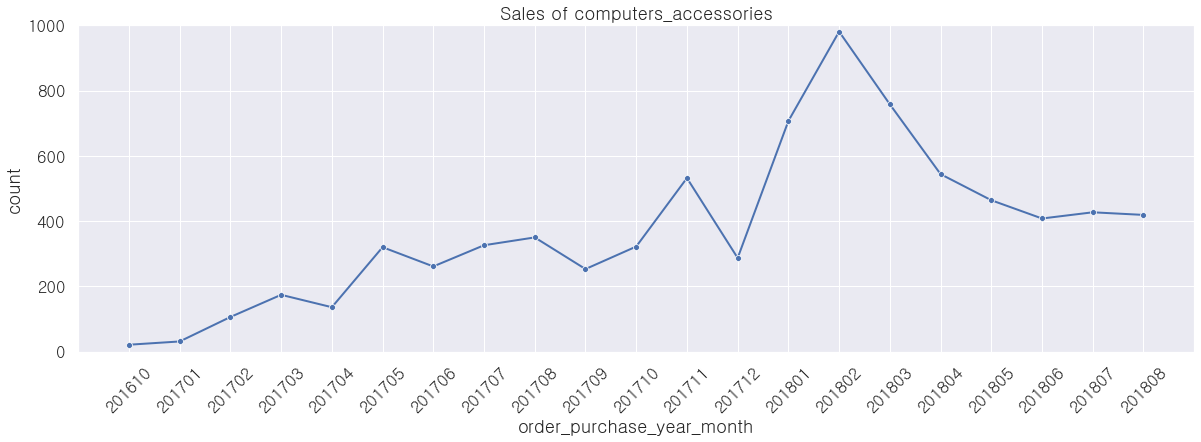

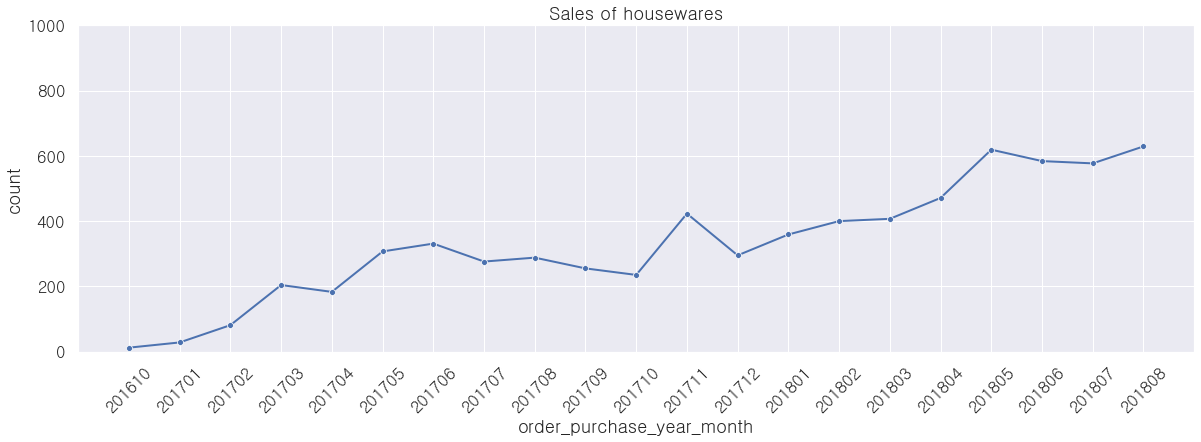

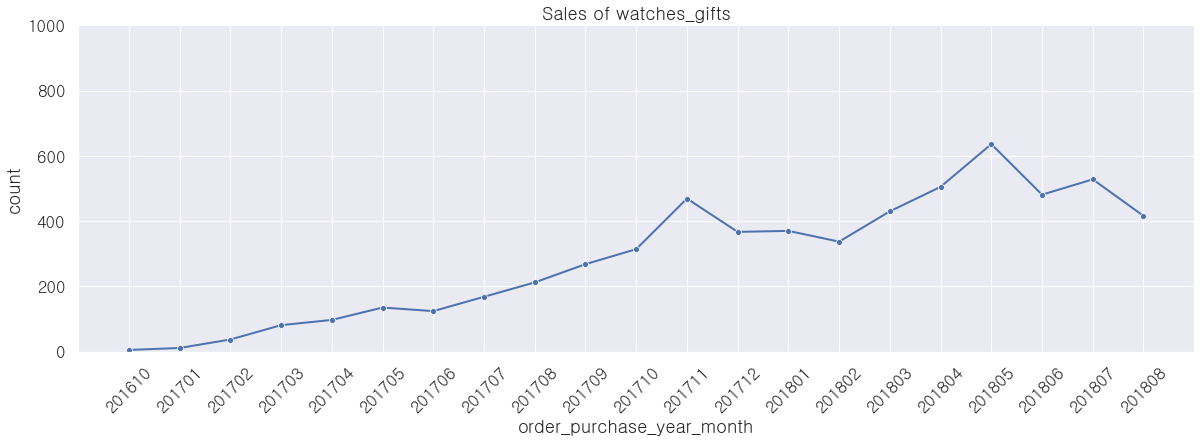

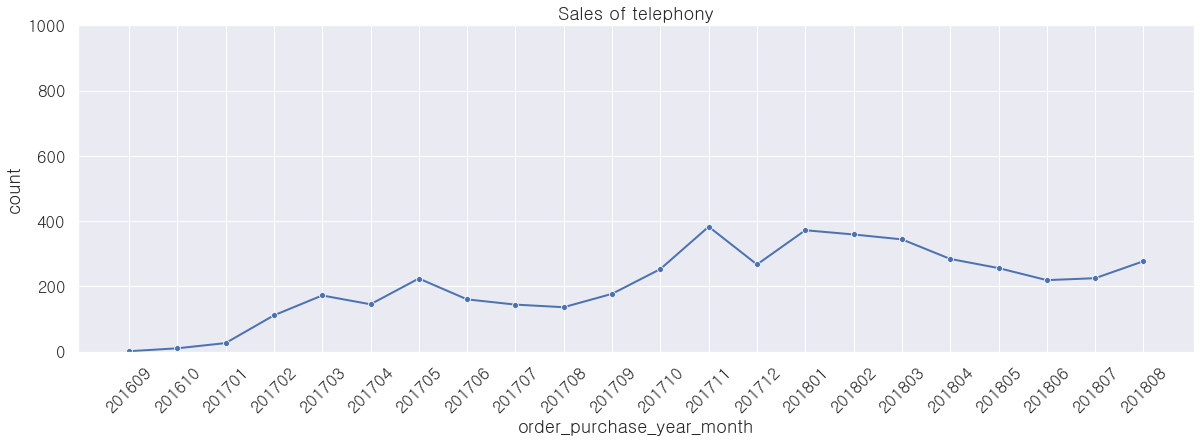

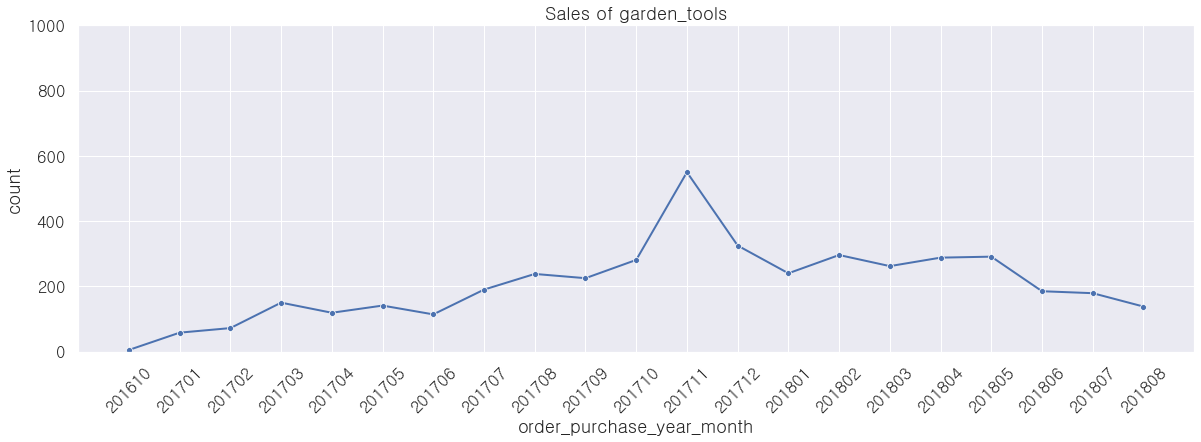

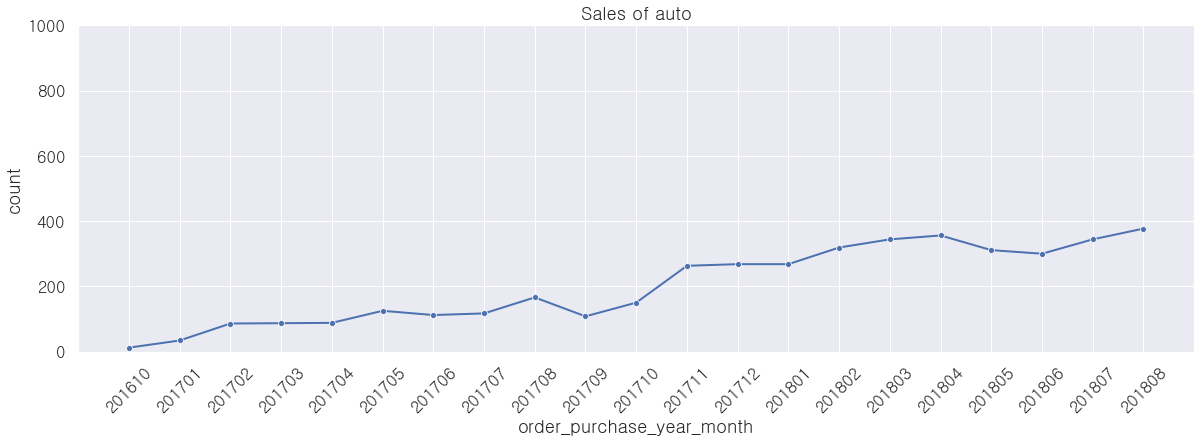

In [142]:

def seasonal_show(prod):
    seasonal_df = products_time_df[products_time_df['product_category_name_english']==prod]
    seasonal_df.rename(columns={'order_id':'count'}, inplace=True)
    seasonal_df = seasonal_df.groupby('order_purchase_year_month').count()[['count']]
    seasonal_df
    plt.figure(figsize=(20,6))
    plt.title('Sales of ' + prod)
    sns.lineplot(x='order_purchase_year_month', y='count', data=seasonal_df, linewidth=2, marker='o')
    plt.xticks(rotation=45)
    plt.ylim(0, 1000)
    plt.show()
top10_prod = list(result.index)
for p in top10_prod:
    seasonal_show(p)
